# Importing Libraries

In [4]:
import math #mathematical computation
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib #saving the model
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision Tree Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score #Performance metrics

from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from xgboost import XGBRegressor # XGBoost Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import cross_validate #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning

from statistics import stdev
from warnings import simplefilter #Filtering warnings

import warnings
warnings.filterwarnings('ignore')

##showing all columns in output##
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')
#################################

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


# Loading Dataset 

In [5]:
raw_data = pd.read_excel('Vaccine_Hesitancy_Dataset.xlsx') #loading the raw_dataset from excel sheet
raw_data.head()
raw_data.shape

(3647, 39)

# Decision Tree

## Data Preprocessing

In [6]:
df_dt = raw_data.copy()

df_dt = df_dt.drop("ID1", axis=1)
df_dt = df_dt.drop("Datafrom", axis=1)
df_dt = df_dt.drop("vaccine_acceptance", axis=1)

df_dt.dropna(axis=1, how='all')
df_dt.dropna(axis=0, how='all')

df_dt['S5_Education1'] = df_dt['S5_Education1'].str.slice(stop=1)
df_dt['S7_Monthly_F_income1'] = df_dt['S7_Monthly_F_income1'].str.slice(stop=1)
df_dt['A1_vaccine_acceptance1'] = df_dt['A1_vaccine_acceptance1'].str.slice(stop=1)
df_dt['A2_trust_health_system1'] = df_dt['A2_trust_health_system1'].str.slice(stop=1)
df_dt['Agegroup'] = df_dt['Agegroup'].str.slice(stop=1)
df_dt['R4_Comply_instruction_government1'] = df_dt['R4_Comply_instruction_government1'].str.slice(stop=1)
df_dt['R2_odds_of_you_infected_COVID_191'] = df_dt['R2_odds_of_you_infected_COVID_191'].str.slice(stop=1)
df_dt['R5_mitigation_measures_taken_govenment1'] = df_dt['R5_mitigation_measures_taken_govenment1'].str.slice(stop=1)
df_dt.head()

,S1_Address1,S2_Age1,S3_Sex1,S5_Education1,S6_Employement1,S6_Employement2,S7_Monthly_F_income1,S8_Location1,S9_Marital_Status1,S10_Diabetis1,...,R4_Comply_instruction_government1,R5_mitigation_measures_taken_govenment1,A1_vaccine_acceptance1,A2_trust_health_system1,A3_Trust_information_regarding_media1,A4_adverse_effected_COVID_191,F1_pay_for_vaccine1,F2_maximum_dose1,Agegroup,Comorbidity
0,Rajshahi,38.0,Female,4,Doctor/teacher,HCW,3,Semi-urban,Married,No,...,3,1,3,3,Low,NaN,Intend to pay,Single,2,No
1,Rajshahi,36.0,Male,4,Doctor/teacher,HCW,3,Semi-urban,Married,No,...,3,2,3,3,Moderate,NaN,Intend to pay,any,2,No
2,Rajshahi,43.0,Female,3,Housewife,Housewife,1,Rural,Married,No,...,3,2,3,3,Low,NaN,Free,Single,3,No
3,Rajshahi,48.0,Male,2,Agriculture,Agriculture,2,Rural,Married,No,...,2,2,3,3,Moderate,NaN,Free,Single,3,No
4,Rajshahi,30.0,Female,4,Day-labor,Day-labor,2,Semi-urban,Married,No,...,3,2,3,3,Low,NaN,Intend to pay,any,1,No


In [7]:
new_columns =['Address', 'Age', 'Sex', 'Education', 'Employment1','Employment2','Monthly Income', 'Location','Marital Status','Diabetes','Hypertension','Chronic Kidney Disease','Chronic Respiratory Disease',
           'Chronic Heart Disease','Cancer','Other Disease','Own House','Motor Cycle','Rickshaw_Van','Pickup_Bus_Car','Television',
          'Toilet Facilities','House Material','Perception_Covid19','Odds_infected','COVID19 Infection','Comply_Instruction','Mitigation_Measures',
          'Vaccine_Acceptance','Trust_HealthSystem','Trust_Media','Adverse_Vaccine','Payment','MaxDose Willingness','AgeGroup',
          'Comorbidity']
df_dt.columns = new_columns
print(df_dt.shape)
df_dt.head()

(3647, 36)


,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,...,Comply_Instruction,Mitigation_Measures,Vaccine_Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity
0,Rajshahi,38.0,Female,4,Doctor/teacher,HCW,3,Semi-urban,Married,No,...,3,1,3,3,Low,NaN,Intend to pay,Single,2,No
1,Rajshahi,36.0,Male,4,Doctor/teacher,HCW,3,Semi-urban,Married,No,...,3,2,3,3,Moderate,NaN,Intend to pay,any,2,No
2,Rajshahi,43.0,Female,3,Housewife,Housewife,1,Rural,Married,No,...,3,2,3,3,Low,NaN,Free,Single,3,No
3,Rajshahi,48.0,Male,2,Agriculture,Agriculture,2,Rural,Married,No,...,2,2,3,3,Moderate,NaN,Free,Single,3,No
4,Rajshahi,30.0,Female,4,Day-labor,Day-labor,2,Semi-urban,Married,No,...,3,2,3,3,Low,NaN,Intend to pay,any,1,No


In [8]:
for column in new_columns:
  if(df_dt[column].dtype == object):
    df_dt[column] = df_dt[column].str.strip()


In [9]:
df_dt.Employment2 = df_dt.Employment2.str.replace('0.Job','Job')

## Data Pre-Processing for Decision Tree

In [10]:
df_dt.columns

Index(['Address', 'Age', 'Sex', 'Education', 'Employment1', 'Employment2',
       'Monthly Income', 'Location', 'Marital Status', 'Diabetes',
       'Hypertension', 'Chronic Kidney Disease', 'Chronic Respiratory Disease',
       'Chronic Heart Disease', 'Cancer', 'Other Disease', 'Own House',
       'Motor Cycle', 'Rickshaw_Van', 'Pickup_Bus_Car', 'Television',
       'Toilet Facilities', 'House Material', 'Perception_Covid19',
       'Odds_infected', 'COVID19 Infection', 'Comply_Instruction',
       'Mitigation_Measures', 'Vaccine_Acceptance', 'Trust_HealthSystem',
       'Trust_Media', 'Adverse_Vaccine', 'Payment', 'MaxDose Willingness',
       'AgeGroup', 'Comorbidity'],
      dtype='object')

In [11]:
for column in df_dt:
    unique_vals = df_dt[column].unique()
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {}: {} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {}: {}'.format(column, nr_values))

The number of values for feature Address: 46
The number of values for feature Age: 67
The number of values for feature Sex: 3 -- ['Female' 'Male' nan]
The number of values for feature Education: 6 -- ['4' '3' '2' '1' '5' nan]
The number of values for feature Employment1: 10 -- ['Doctor/teacher' 'Housewife' 'Agriculture' 'Day-labor' 'Business' 'Job'
 'Unemployed' 'Student' 'Retired' nan]
The number of values for feature Employment2: 8 -- ['HCW' 'Housewife' 'Agriculture' 'Day-labor' 'Business' 'Job'
 'Not working' nan]
The number of values for feature Monthly Income: 6 -- ['3' '1' '2' nan '5' '4']
The number of values for feature Location: 4 -- ['Semi-urban' 'Rural' '0.Urban' 'Slum']
The number of values for feature Marital Status: 3 -- ['Married' 'Divorce/Separated/Widowed' '0.Single']
The number of values for feature Diabetes: 3 -- ['No' 'Yes' nan]
The number of values for feature Hypertension: 3 -- ['No' 'Yes' nan]
The number of values for feature Chronic Kidney Disease: 3 -- ['No' 'Y

In [12]:
# Checking for null values
df_dt.isnull().sum()

Address                           0
Age                               2
Sex                               1
Education                        20
Employment1                     784
Employment2                     784
Monthly Income                   29
Location                          0
Marital Status                    0
Diabetes                          4
Hypertension                      3
Chronic Kidney Disease            3
Chronic Respiratory Disease       3
Chronic Heart Disease             3
Cancer                            3
Other Disease                     3
Own House                         2
Motor Cycle                       6
Rickshaw_Van                      6
Pickup_Bus_Car                    6
Television                        2
Toilet Facilities                 2
House Material                   10
Perception_Covid19               93
Odds_infected                    92
COVID19 Infection                 3
Comply_Instruction                4
Mitigation_Measures         

In [13]:
df_dt.columns 

Index(['Address', 'Age', 'Sex', 'Education', 'Employment1', 'Employment2',
       'Monthly Income', 'Location', 'Marital Status', 'Diabetes',
       'Hypertension', 'Chronic Kidney Disease', 'Chronic Respiratory Disease',
       'Chronic Heart Disease', 'Cancer', 'Other Disease', 'Own House',
       'Motor Cycle', 'Rickshaw_Van', 'Pickup_Bus_Car', 'Television',
       'Toilet Facilities', 'House Material', 'Perception_Covid19',
       'Odds_infected', 'COVID19 Infection', 'Comply_Instruction',
       'Mitigation_Measures', 'Vaccine_Acceptance', 'Trust_HealthSystem',
       'Trust_Media', 'Adverse_Vaccine', 'Payment', 'MaxDose Willingness',
       'AgeGroup', 'Comorbidity'],
      dtype='object')

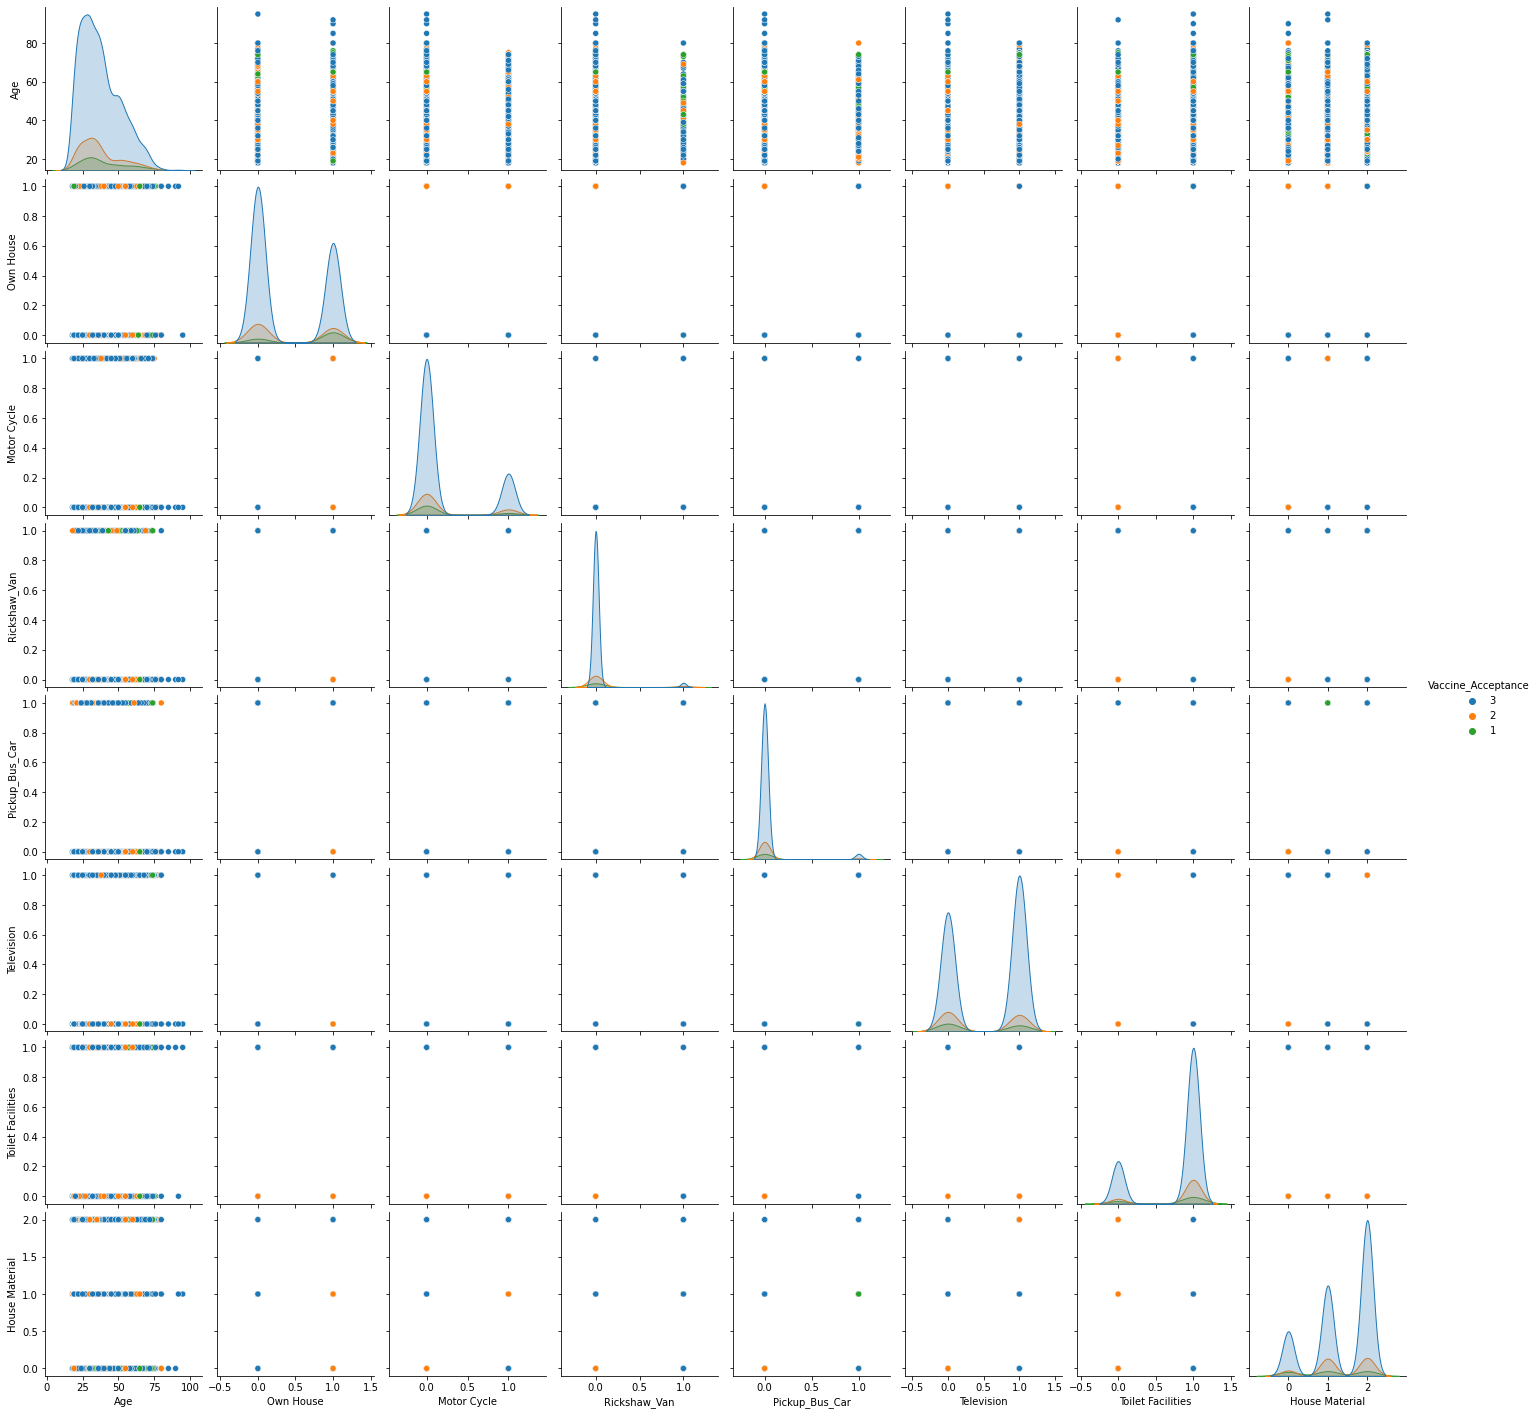

In [14]:
#visualize the dataset with sns pairplot
#caution: takes a lot of data - so we limit the data
g = sns.pairplot(df_dt, hue = 'Vaccine_Acceptance')

### Investigate the categorical plots

In [15]:
df_dt2 = df_dt.copy()

In [16]:
df_dt2.head()

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,...,Comply_Instruction,Mitigation_Measures,Vaccine_Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity
0,Rajshahi,38.0,Female,4,Doctor/teacher,HCW,3,Semi-urban,Married,No,...,3,1,3,3,Low,NaN,Intend to pay,Single,2,No
1,Rajshahi,36.0,Male,4,Doctor/teacher,HCW,3,Semi-urban,Married,No,...,3,2,3,3,Moderate,NaN,Intend to pay,any,2,No
2,Rajshahi,43.0,Female,3,Housewife,Housewife,1,Rural,Married,No,...,3,2,3,3,Low,NaN,Free,Single,3,No
3,Rajshahi,48.0,Male,2,Agriculture,Agriculture,2,Rural,Married,No,...,2,2,3,3,Moderate,NaN,Free,Single,3,No
4,Rajshahi,30.0,Female,4,Day-labor,Day-labor,2,Semi-urban,Married,No,...,3,2,3,3,Low,NaN,Intend to pay,any,1,No


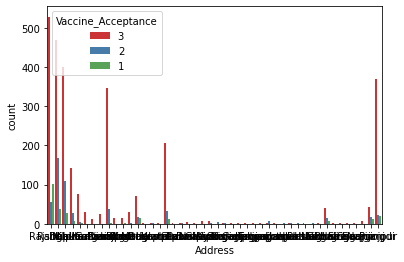

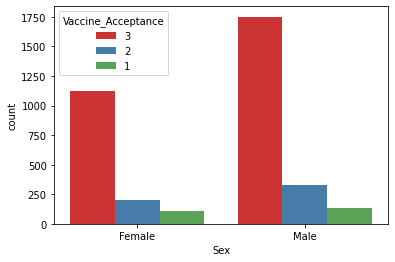

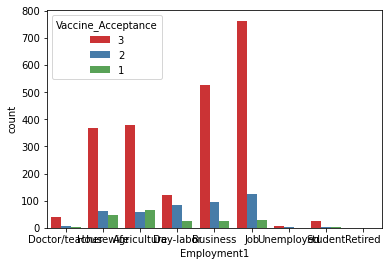

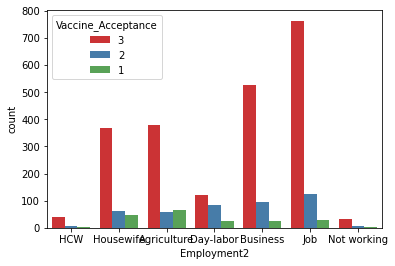

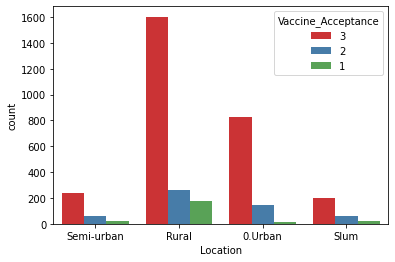

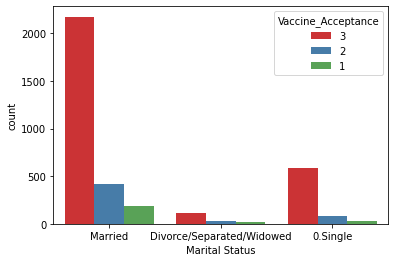

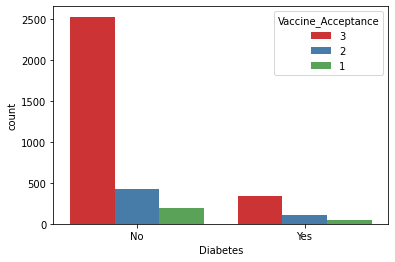

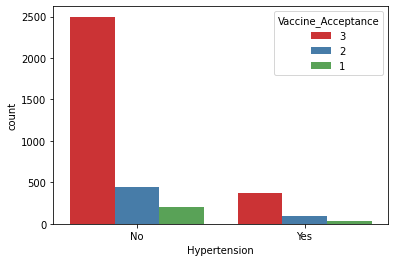

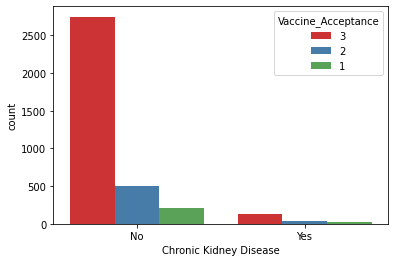

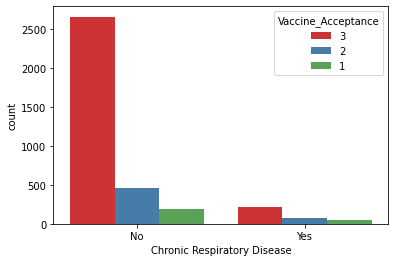

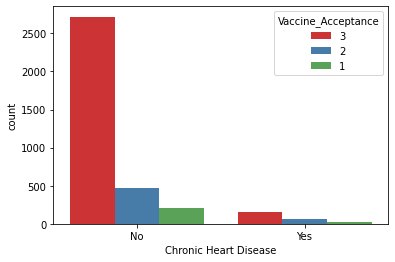

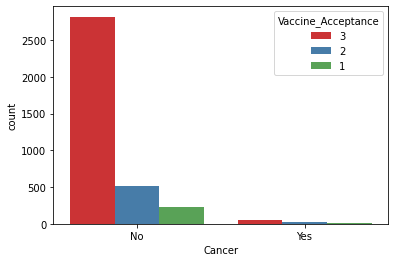

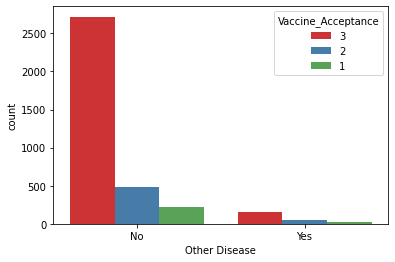

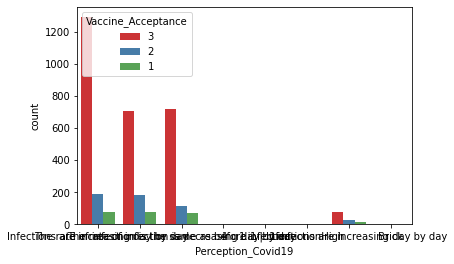

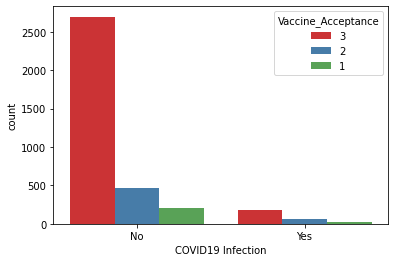

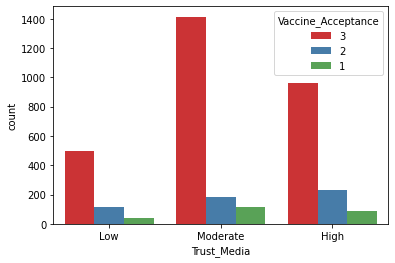

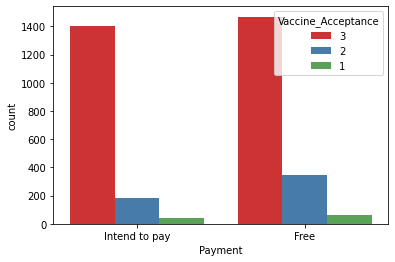

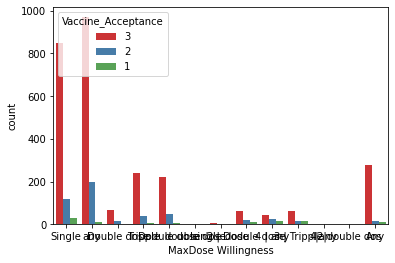

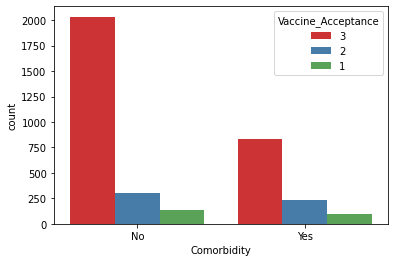

In [17]:
cat_features = ['Address', 'Sex', 'Employment1', 'Employment2', 'Location', 'Marital Status', 'Diabetes', 'Hypertension', 'Chronic Kidney Disease', 'Chronic Respiratory Disease', 'Chronic Heart Disease', 'Cancer', 'Other Disease', 'Perception_Covid19', 'COVID19 Infection', 'Trust_Media', 'Payment', 'MaxDose Willingness', 'Comorbidity']
for f in cat_features:
    plt.figure()
    sns.countplot(x = f, data = df_dt2, hue = 'Vaccine_Acceptance', palette = 'Set1')

### Making numeric representation of categorical variables

In [18]:
print(df_dt2.shape)
df_dt2.head()

(3647, 36)


,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,...,Comply_Instruction,Mitigation_Measures,Vaccine_Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity
0,Rajshahi,38.0,Female,4,Doctor/teacher,HCW,3,Semi-urban,Married,No,...,3,1,3,3,Low,NaN,Intend to pay,Single,2,No
1,Rajshahi,36.0,Male,4,Doctor/teacher,HCW,3,Semi-urban,Married,No,...,3,2,3,3,Moderate,NaN,Intend to pay,any,2,No
2,Rajshahi,43.0,Female,3,Housewife,Housewife,1,Rural,Married,No,...,3,2,3,3,Low,NaN,Free,Single,3,No
3,Rajshahi,48.0,Male,2,Agriculture,Agriculture,2,Rural,Married,No,...,2,2,3,3,Moderate,NaN,Free,Single,3,No
4,Rajshahi,30.0,Female,4,Day-labor,Day-labor,2,Semi-urban,Married,No,...,3,2,3,3,Low,NaN,Intend to pay,any,1,No


In [19]:
df_dt3 = pd.get_dummies(df_dt2, columns = ['Address', 'Sex', 'Employment1', 'Employment2', 'Location', 'Marital Status', 'Diabetes', 'Hypertension', 'Chronic Kidney Disease', 'Chronic Respiratory Disease', 'Chronic Heart Disease', 'Cancer', 'Other Disease', 'Perception_Covid19', 'COVID19 Infection', 'Trust_Media', 'Payment', 'MaxDose Willingness', 'Comorbidity'])
print(df_dt3.shape)
df_dt3.head()

(3647, 132)


,Age,Education,Monthly Income,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,...,MaxDose Willingness_Any,MaxDose Willingness_Dodule dose,MaxDose Willingness_Double dose,MaxDose Willingness_Single,MaxDose Willingness_Tripple,MaxDose Willingness_any,MaxDose Willingness_double dose,MaxDose Willingness_single dose,Comorbidity_No,Comorbidity_Yes
0,38.0,4,3,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0,0,0,1,0,0,0,0,1,0
1,36.0,4,3,0.0,1.0,0.0,0.0,1.0,1.0,2.0,...,0,0,0,0,0,1,0,0,1,0
2,43.0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,48.0,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,30.0,4,2,1.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0,0,0,0,0,1,0,0,1,0


### Cleaning null and string values

In [20]:
df_dt_final = df_dt3.copy()   #copying from previous (df_dt3) dataframe
df_dt_final.isnull().sum()    #seeing null values

Age                                                                     2
Education                                                              20
Monthly Income                                                         29
Own House                                                               2
Motor Cycle                                                             6
Rickshaw_Van                                                            6
Pickup_Bus_Car                                                          6
Television                                                              2
Toilet Facilities                                                       2
House Material                                                         10
Odds_infected                                                          92
Comply_Instruction                                                      4
Mitigation_Measures                                                    95
Vaccine_Acceptance                    

In [21]:
df_dt_final = df_dt_final.drop(['Comply_Instruction', 'Mitigation_Measures', 'Trust_HealthSystem', 'Adverse_Vaccine', 'AgeGroup'], axis=1) #removing object entries

df_dt_final.isnull().sum() #seeing null values

Age                                                                   2
Education                                                            20
Monthly Income                                                       29
Own House                                                             2
Motor Cycle                                                           6
Rickshaw_Van                                                          6
Pickup_Bus_Car                                                        6
Television                                                            2
Toilet Facilities                                                     2
House Material                                                       10
Odds_infected                                                        92
Vaccine_Acceptance                                                    0
Address_Barishal                                                      0
Address_Bogura                                                  

In [22]:
df_dt_final = df_dt_final.dropna()
df_dt_final.isnull().sum() 

Age                                                                  0
Education                                                            0
Monthly Income                                                       0
Own House                                                            0
Motor Cycle                                                          0
Rickshaw_Van                                                         0
Pickup_Bus_Car                                                       0
Television                                                           0
Toilet Facilities                                                    0
House Material                                                       0
Odds_infected                                                        0
Vaccine_Acceptance                                                   0
Address_Barishal                                                     0
Address_Bogura                                                       0
Addres

## Scaling the columns

In [23]:
df_dt_final.describe()

,Age,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Address_Barishal,Address_Bogura,...,MaxDose Willingness_Any,MaxDose Willingness_Dodule dose,MaxDose Willingness_Double dose,MaxDose Willingness_Single,MaxDose Willingness_Tripple,MaxDose Willingness_any,MaxDose Willingness_double dose,MaxDose Willingness_single dose,Comorbidity_No,Comorbidity_Yes
count,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,...,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000
mean,37.383095,0.420917,0.212894,0.041261,0.038968,0.548997,0.785673,1.358166,0.000573,0.004298,...,0.087106,0.078510,0.022636,0.281948,0.079943,0.330659,0.000573,0.001433,0.671633,0.328367
std,13.914747,0.493777,0.409412,0.198921,0.193548,0.497665,0.410413,0.736840,0.023935,0.065427,...,0.282031,0.269011,0.148762,0.450013,0.271243,0.470518,0.023935,0.037829,0.469686,0.469686
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,46.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df_dt_final.shape

(3490, 127)

In [25]:
#the columns that require scaling include
scale_vars = ['Age']
scaler = MinMaxScaler()
df_dt_final[scale_vars] = scaler.fit_transform(df_dt_final[scale_vars])
df_dt_final.head()

,Age,Education,Monthly Income,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,...,MaxDose Willingness_Any,MaxDose Willingness_Dodule dose,MaxDose Willingness_Double dose,MaxDose Willingness_Single,MaxDose Willingness_Tripple,MaxDose Willingness_any,MaxDose Willingness_double dose,MaxDose Willingness_single dose,Comorbidity_No,Comorbidity_Yes
0,0.259740,4,3,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0,0,0,1,0,0,0,0,1,0
1,0.233766,4,3,0.0,1.0,0.0,0.0,1.0,1.0,2.0,...,0,0,0,0,0,1,0,0,1,0
2,0.324675,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,0.389610,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,0.155844,4,2,1.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0,0,0,0,0,1,0,0,1,0


## 5. Splitting the Raw Data

In [26]:
###Hold-out validation###

X = df_dt_final.drop(columns = ['Vaccine_Acceptance']).values   #Input features (attributes)
y = df_dt_final['Vaccine_Acceptance'].values                    #Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

X shape: (3490, 126)
y shape: (3490,)


## Decision Tree

### Running a Decision Tree

In [27]:
# create a model 
dt = DecisionTreeClassifier(max_depth = 2, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [28]:
import graphviz 

dot_data = tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=df_dt_final.drop('Vaccine_Acceptance', axis=1).columns,    
    class_names=df_dt_final['Vaccine_Acceptance'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
#graph
#Go to https://dreampuf.github.io/GraphvizOnline
# and put the code in tree.dot to visualize the tree

### Results

In [29]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.793059535179879
Testing Accuracy is:  0.8137535816618912


In [30]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

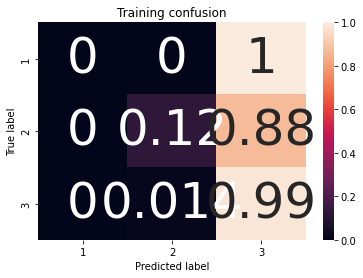

In [31]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [32]:
cm

array([[   0,    0,  203],
       [   0,   57,  412],
       [   0,   35, 2434]])

# K-Nearest Neighbors

In [317]:
df = raw_data.copy()

## Data Preprocessing

In [318]:
df.head()

,ID1,S1_Address1,S2_Age1,S3_Sex1,S5_Education1,S6_Employement1,S6_Employement2,S7_Monthly_F_income1,S8_Location1,S9_Marital_Status1,...,A1_vaccine_acceptance1,A2_trust_health_system1,A3_Trust_information_regarding_media1,A4_adverse_effected_COVID_191,F1_pay_for_vaccine1,F2_maximum_dose1,Datafrom,Agegroup,Comorbidity,vaccine_acceptance
0,MIN1,Rajshahi,38.0,Female,4.11-12,Doctor/teacher,HCW,3.20001-50000,Semi-urban,Married,...,3.Intend to vaccinate,3.High,Low,NaN,Intend to pay,Single,MIN,2.31-40,No,0
1,MIN2,Rajshahi,36.0,Male,4.11-12,Doctor/teacher,HCW,3.20001-50000,Semi-urban,Married,...,3.Intend to vaccinate,3.High,Moderate,NaN,Intend to pay,any,MIN,2.31-40,No,0
2,MIN3,Rajshahi,43.0,Female,3.6-10,Housewife,Housewife,1.<=10000,Rural,Married,...,3.Intend to vaccinate,3.High,Low,NaN,Free,Single,MIN,3.41-50,No,0
3,MIN4,Rajshahi,48.0,Male,2.1-5,Agriculture,Agriculture,2.10001-20000,Rural,Married,...,3.Intend to vaccinate,3.High,Moderate,NaN,Free,Single,MIN,3.41-50,No,0
4,MIN5,Rajshahi,30.0,Female,4.11-12,Day-labor,Day-labor,2.10001-20000,Semi-urban,Married,...,3.Intend to vaccinate,3.High,Low,NaN,Intend to pay,any,MIN,1.<=30,No,0


In [319]:
df.head()

,ID1,S1_Address1,S2_Age1,S3_Sex1,S5_Education1,S6_Employement1,S6_Employement2,S7_Monthly_F_income1,S8_Location1,S9_Marital_Status1,...,A1_vaccine_acceptance1,A2_trust_health_system1,A3_Trust_information_regarding_media1,A4_adverse_effected_COVID_191,F1_pay_for_vaccine1,F2_maximum_dose1,Datafrom,Agegroup,Comorbidity,vaccine_acceptance
0,MIN1,Rajshahi,38.0,Female,4.11-12,Doctor/teacher,HCW,3.20001-50000,Semi-urban,Married,...,3.Intend to vaccinate,3.High,Low,NaN,Intend to pay,Single,MIN,2.31-40,No,0
1,MIN2,Rajshahi,36.0,Male,4.11-12,Doctor/teacher,HCW,3.20001-50000,Semi-urban,Married,...,3.Intend to vaccinate,3.High,Moderate,NaN,Intend to pay,any,MIN,2.31-40,No,0
2,MIN3,Rajshahi,43.0,Female,3.6-10,Housewife,Housewife,1.<=10000,Rural,Married,...,3.Intend to vaccinate,3.High,Low,NaN,Free,Single,MIN,3.41-50,No,0
3,MIN4,Rajshahi,48.0,Male,2.1-5,Agriculture,Agriculture,2.10001-20000,Rural,Married,...,3.Intend to vaccinate,3.High,Moderate,NaN,Free,Single,MIN,3.41-50,No,0
4,MIN5,Rajshahi,30.0,Female,4.11-12,Day-labor,Day-labor,2.10001-20000,Semi-urban,Married,...,3.Intend to vaccinate,3.High,Low,NaN,Intend to pay,any,MIN,1.<=30,No,0


In [320]:
df.columns

Index(['ID1', 'S1_Address1', 'S2_Age1', 'S3_Sex1', 'S5_Education1',
       'S6_Employement1', 'S6_Employement2', 'S7_Monthly_F_income1',
       'S8_Location1', 'S9_Marital_Status1', 'S10_Diabetis1', 'S10_HTN1',
       'S10_CKD1', 'S10_CRD1', 'S10_CHD1', 'S10_Cancer1', 'S10_others1',
       'S11_Own_house1', 'S12_Motor_cycle_CNG1', 'S12_Rickshaw_Van1',
       'S12_Pickup_Bus_Car1', 'S13_television1', 'S14_toilet1',
       'S15_matarial_house1', 'R1_perception_COVID_191',
       'R2_odds_of_you_infected_COVID_191', 'R3_you_affected_COVID_191',
       'R4_Comply_instruction_government1',
       'R5_mitigation_measures_taken_govenment1', 'A1_vaccine_acceptance1',
       'A2_trust_health_system1', 'A3_Trust_information_regarding_media1',
       'A4_adverse_effected_COVID_191', 'F1_pay_for_vaccine1',
       'F2_maximum_dose1', 'Datafrom', 'Agegroup', 'Comorbidity',
       'vaccine_acceptance'],
      dtype='object')

In [321]:
df = df.drop("ID1", axis=1) #Discarding Unnecessary Columns

In [322]:
df.columns

Index(['S1_Address1', 'S2_Age1', 'S3_Sex1', 'S5_Education1', 'S6_Employement1',
       'S6_Employement2', 'S7_Monthly_F_income1', 'S8_Location1',
       'S9_Marital_Status1', 'S10_Diabetis1', 'S10_HTN1', 'S10_CKD1',
       'S10_CRD1', 'S10_CHD1', 'S10_Cancer1', 'S10_others1', 'S11_Own_house1',
       'S12_Motor_cycle_CNG1', 'S12_Rickshaw_Van1', 'S12_Pickup_Bus_Car1',
       'S13_television1', 'S14_toilet1', 'S15_matarial_house1',
       'R1_perception_COVID_191', 'R2_odds_of_you_infected_COVID_191',
       'R3_you_affected_COVID_191', 'R4_Comply_instruction_government1',
       'R5_mitigation_measures_taken_govenment1', 'A1_vaccine_acceptance1',
       'A2_trust_health_system1', 'A3_Trust_information_regarding_media1',
       'A4_adverse_effected_COVID_191', 'F1_pay_for_vaccine1',
       'F2_maximum_dose1', 'Datafrom', 'Agegroup', 'Comorbidity',
       'vaccine_acceptance'],
      dtype='object')

In [323]:
new_cols =['Address', 'Age', 'Sex', 'Education', 'Employment1','Employment2','Monthly Income', 'Location','Marital Status','Diabetes','Hypertension','Chronic Kidney Disease','Chronic Respiratory Disease',
           'Chronic Heart Disease','Cancer','Other Disease','Own House','Motor Cycle','Rickshaw_Van','Pickup_Bus_Car','Television',
          'Toilet Facilities','House Material','Perception_Covid19','Odds_infected','COVID19 Infection','Comply_Instruction','Mitigation_Measures',
          'Vaccine Acceptance','Trust_HealthSystem','Trust_Media','Adverse_Vaccine','Payment','MaxDose Willingness','Datafrom','AgeGroup',
          'Comorbidity','Vaccine_Acceptance']
df.columns = new_cols
df.head()

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,...,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,Datafrom,AgeGroup,Comorbidity,Vaccine_Acceptance
0,Rajshahi,38.0,Female,4.11-12,Doctor/teacher,HCW,3.20001-50000,Semi-urban,Married,No,...,3.Intend to vaccinate,3.High,Low,NaN,Intend to pay,Single,MIN,2.31-40,No,0
1,Rajshahi,36.0,Male,4.11-12,Doctor/teacher,HCW,3.20001-50000,Semi-urban,Married,No,...,3.Intend to vaccinate,3.High,Moderate,NaN,Intend to pay,any,MIN,2.31-40,No,0
2,Rajshahi,43.0,Female,3.6-10,Housewife,Housewife,1.<=10000,Rural,Married,No,...,3.Intend to vaccinate,3.High,Low,NaN,Free,Single,MIN,3.41-50,No,0
3,Rajshahi,48.0,Male,2.1-5,Agriculture,Agriculture,2.10001-20000,Rural,Married,No,...,3.Intend to vaccinate,3.High,Moderate,NaN,Free,Single,MIN,3.41-50,No,0
4,Rajshahi,30.0,Female,4.11-12,Day-labor,Day-labor,2.10001-20000,Semi-urban,Married,No,...,3.Intend to vaccinate,3.High,Low,NaN,Intend to pay,any,MIN,1.<=30,No,0


In [324]:
df['Education'] = df['Education'].str.slice(start=2)
df['Monthly Income'] = df['Monthly Income'].str.slice(start=2)
df['Odds_infected'] = df['Odds_infected'].str.slice(start=2)
df['Comply_Instruction'] = df['Comply_Instruction'].str.slice(start=2)
df['Mitigation_Measures'] = df['Mitigation_Measures'].str.slice(start=2)
df['Vaccine Acceptance'] = df['Vaccine Acceptance'].str.slice(start=2)
df['Trust_HealthSystem'] = df['Trust_HealthSystem'].str.slice(start=2)
df['AgeGroup'] = df['AgeGroup'].str.slice(start=2)
df.head()

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,...,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,Datafrom,AgeGroup,Comorbidity,Vaccine_Acceptance
0,Rajshahi,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Intend to vaccinate,High,Low,NaN,Intend to pay,Single,MIN,31-40,No,0
1,Rajshahi,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Intend to vaccinate,High,Moderate,NaN,Intend to pay,any,MIN,31-40,No,0
2,Rajshahi,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,...,Intend to vaccinate,High,Low,NaN,Free,Single,MIN,41-50,No,0
3,Rajshahi,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,...,Intend to vaccinate,High,Moderate,NaN,Free,Single,MIN,41-50,No,0
4,Rajshahi,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,...,Intend to vaccinate,High,Low,NaN,Intend to pay,any,MIN,<=30,No,0


In [325]:
df = df.drop("Datafrom", axis=1) #Discarding Unnecessary Columns
df.head()

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,...,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance
0,Rajshahi,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Low,Intend to vaccinate,High,Low,NaN,Intend to pay,Single,31-40,No,0
1,Rajshahi,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Moderate,Intend to vaccinate,High,Moderate,NaN,Intend to pay,any,31-40,No,0
2,Rajshahi,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,...,Moderate,Intend to vaccinate,High,Low,NaN,Free,Single,41-50,No,0
3,Rajshahi,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,...,Moderate,Intend to vaccinate,High,Moderate,NaN,Free,Single,41-50,No,0
4,Rajshahi,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,...,Moderate,Intend to vaccinate,High,Low,NaN,Intend to pay,any,<=30,No,0


## Exploratory Data Analysis

In [326]:
df.dtypes

Address                         object
Age                            float64
Sex                             object
Education                       object
Employment1                     object
Employment2                     object
Monthly Income                  object
Location                        object
Marital Status                  object
Diabetes                        object
Hypertension                    object
Chronic Kidney Disease          object
Chronic Respiratory Disease     object
Chronic Heart Disease           object
Cancer                          object
Other Disease                   object
Own House                      float64
Motor Cycle                    float64
Rickshaw_Van                   float64
Pickup_Bus_Car                 float64
Television                     float64
Toilet Facilities              float64
House Material                 float64
Perception_Covid19              object
Odds_infected                   object
COVID19 Infection        

In [327]:
df.nunique()

Address                        52
Age                            66
Sex                             2
Education                       5
Employment1                     9
Employment2                     7
Monthly Income                  5
Location                        4
Marital Status                  3
Diabetes                        2
Hypertension                    2
Chronic Kidney Disease          2
Chronic Respiratory Disease     2
Chronic Heart Disease           2
Cancer                          2
Other Disease                   2
Own House                       2
Motor Cycle                     2
Rickshaw_Van                    2
Pickup_Bus_Car                  2
Television                      2
Toilet Facilities               2
House Material                  3
Perception_Covid19              8
Odds_infected                   3
COVID19 Infection               2
Comply_Instruction              3
Mitigation_Measures             3
Vaccine Acceptance              3
Trust_HealthSy

In [328]:
df.isnull().any()

Address                        False
Age                             True
Sex                             True
Education                       True
Employment1                     True
Employment2                     True
Monthly Income                  True
Location                       False
Marital Status                 False
Diabetes                        True
Hypertension                    True
Chronic Kidney Disease          True
Chronic Respiratory Disease     True
Chronic Heart Disease           True
Cancer                          True
Other Disease                   True
Own House                       True
Motor Cycle                     True
Rickshaw_Van                    True
Pickup_Bus_Car                  True
Television                      True
Toilet Facilities               True
House Material                  True
Perception_Covid19              True
Odds_infected                   True
COVID19 Infection               True
Comply_Instruction              True
M

In [329]:
df.isnull().sum()

Address                           0
Age                               2
Sex                               1
Education                        20
Employment1                     784
Employment2                     784
Monthly Income                   29
Location                          0
Marital Status                    0
Diabetes                          4
Hypertension                      3
Chronic Kidney Disease            3
Chronic Respiratory Disease       3
Chronic Heart Disease             3
Cancer                            3
Other Disease                     3
Own House                         2
Motor Cycle                       6
Rickshaw_Van                      6
Pickup_Bus_Car                    6
Television                        2
Toilet Facilities                 2
House Material                   10
Perception_Covid19               93
Odds_infected                    92
COVID19 Infection                 3
Comply_Instruction                4
Mitigation_Measures         

In [330]:
df.Address.unique()

array(['Rajshahi', 'Rangpur        ', 'Rajshahi       ', 'Dhaka',
       'Khulna', 'Nilphamari     ', 'Lalmonirhat    ', 'Kurigarm       ',
       'Gaibandha      ', 'Dinajpur       ', 'Panchagarh     ',
       'Bogura         ', 'Kushtia        ', 'Khulna         ',
       'Chottogram', 'Meherpur       ', 'Doulatpur      ',
       'Kushita        ', 'Jamalpur      ', 'Savar          ',
       'Pabna          ', 'Laxmipur       ', 'Barishal       ',
       'Gazipur        ', 'Narayanganj    ', 'Manikganj      ',
       'Kishoregonj    ', 'Shariatpur     ', 'Kishoreganj    ',
       'Gopalganj      ', 'Tangail        ', 'Kishorganj     ',
       'pabna          ', 'jamalpur       ', 'kustia         ',
       'potuakhali     ', 'pakshi         ', 'chuadanga      ',
       'Potuakhali     ', 'Magura         ', 'Satkhira       ',
       'Borguna        ', 'Habiganj       ', 'Sirajgonj      ',
       'Jamalpur       ', 'Sherpur        ', ' Dinajpur      ',
       'Sirajganj      ', 'Jamalpu

In [331]:
df.Address = df.Address.str.replace(' ','')
df.Address.unique()

array(['Rajshahi', 'Rangpur', 'Dhaka', 'Khulna', 'Nilphamari',
       'Lalmonirhat', 'Kurigarm', 'Gaibandha', 'Dinajpur', 'Panchagarh',
       'Bogura', 'Kushtia', 'Chottogram', 'Meherpur', 'Doulatpur',
       'Kushita', 'Jamalpur', 'Savar', 'Pabna', 'Laxmipur', 'Barishal',
       'Gazipur', 'Narayanganj', 'Manikganj', 'Kishoregonj', 'Shariatpur',
       'Kishoreganj', 'Gopalganj', 'Tangail', 'Kishorganj', 'pabna',
       'jamalpur', 'kustia', 'potuakhali', 'pakshi', 'chuadanga',
       'Potuakhali', 'Magura', 'Satkhira', 'Borguna', 'Habiganj',
       'Sirajgonj', 'Sherpur', 'Sirajganj', 'Narsingdi', 'Pirojpur'],
      dtype=object)

In [332]:
df.Education.unique()

array(['11-12', '6-10', '1-5', 'No Schooling', '>12', nan], dtype=object)

In [333]:
df.Employment1.unique()

array(['Doctor/teacher', 'Housewife', 'Agriculture', 'Day-labor',
       'Business', 'Job', 'Unemployed', 'Student', 'Retired', nan],
      dtype=object)

In [334]:
df.Employment2.unique()

array(['HCW', 'Housewife', 'Agriculture', 'Day-labor', 'Business',
       '0.Job', 'Not working', nan], dtype=object)

In [335]:
df2 = df.copy()

In [336]:
df2.Employment2 = df2.Employment2.str.replace('0.Job','Job')

In [337]:
df2.Employment2.unique()

array(['HCW', 'Housewife', 'Agriculture', 'Day-labor', 'Business', 'Job',
       'Not working', nan], dtype=object)

In [338]:
df.Employment2 = df2.Employment2
df.Employment2.unique()

array(['HCW', 'Housewife', 'Agriculture', 'Day-labor', 'Business', 'Job',
       'Not working', nan], dtype=object)

In [339]:
df.head()

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,...,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance
0,Rajshahi,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Low,Intend to vaccinate,High,Low,NaN,Intend to pay,Single,31-40,No,0
1,Rajshahi,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Moderate,Intend to vaccinate,High,Moderate,NaN,Intend to pay,any,31-40,No,0
2,Rajshahi,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,...,Moderate,Intend to vaccinate,High,Low,NaN,Free,Single,41-50,No,0
3,Rajshahi,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,...,Moderate,Intend to vaccinate,High,Moderate,NaN,Free,Single,41-50,No,0
4,Rajshahi,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,...,Moderate,Intend to vaccinate,High,Low,NaN,Intend to pay,any,<=30,No,0


In [340]:
df["Address"].value_counts()

Rajshahi       685
Rangpur        675
Dhaka          534
Pirojpur       412
Dinajpur       384
Jamalpur       249
Khulna         175
Chottogram     103
Nilphamari      82
Narsingdi       73
Satkhira        65
Kushtia         33
Lalmonirhat     30
Gaibandha       25
Bogura          15
Panchagarh      15
Kurigarm        12
pabna           10
Narayanganj      9
Gazipur          8
Sirajganj        7
Laxmipur         5
Manikganj        4
Pabna            3
Doulatpur        3
Savar            3
Kishoregonj      3
Barishal         2
Meherpur         2
Kishorganj       2
kustia           2
potuakhali       2
Borguna          2
Kushita          1
Sherpur          1
Sirajgonj        1
Habiganj         1
pakshi           1
Magura           1
Potuakhali       1
chuadanga        1
jamalpur         1
Tangail          1
Gopalganj        1
Kishoreganj      1
Shariatpur       1
Name: Address, dtype: int64

In [341]:
df["Education"].value_counts()

6-10            1031
>12              890
11-12            650
1-5              589
No Schooling     467
Name: Education, dtype: int64

In [342]:
df["Monthly Income"].value_counts()

<=10000        1366
10001-20000    1049
20001-50000     879
50K-100K        283
>100K            41
Name: Monthly Income, dtype: int64

#### Charts and Diagrams:

In [343]:
df.nunique()

Address                        46
Age                            66
Sex                             2
Education                       5
Employment1                     9
Employment2                     7
Monthly Income                  5
Location                        4
Marital Status                  3
Diabetes                        2
Hypertension                    2
Chronic Kidney Disease          2
Chronic Respiratory Disease     2
Chronic Heart Disease           2
Cancer                          2
Other Disease                   2
Own House                       2
Motor Cycle                     2
Rickshaw_Van                    2
Pickup_Bus_Car                  2
Television                      2
Toilet Facilities               2
House Material                  3
Perception_Covid19              8
Odds_infected                   3
COVID19 Infection               2
Comply_Instruction              3
Mitigation_Measures             3
Vaccine Acceptance              3
Trust_HealthSy

In [344]:
df.head()

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,...,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance
0,Rajshahi,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Low,Intend to vaccinate,High,Low,NaN,Intend to pay,Single,31-40,No,0
1,Rajshahi,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Moderate,Intend to vaccinate,High,Moderate,NaN,Intend to pay,any,31-40,No,0
2,Rajshahi,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,...,Moderate,Intend to vaccinate,High,Low,NaN,Free,Single,41-50,No,0
3,Rajshahi,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,...,Moderate,Intend to vaccinate,High,Moderate,NaN,Free,Single,41-50,No,0
4,Rajshahi,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,...,Moderate,Intend to vaccinate,High,Low,NaN,Intend to pay,any,<=30,No,0


In [345]:
# features = [ 'Sex','Education', 'Employment1', 'Employment2', 'Monthly Income', 'Marital Status'
#            'Location','Perception_Covid19','Odds_infected','Comply_Instruction','Mitigation_Measures','Vaccine Acceptance',
#            'Trust_HealthSystem','Trust_Media','Payment', 'MaxDose Willingness', 'AgeGroup','Comorbidity']

# for f in features:
#     sns.countplot(x = f, data = df, palette = 'Set3')
#     plt.xticks(rotation=45)
#     plt.show()

In [346]:
df.head()

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,...,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance
0,Rajshahi,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Low,Intend to vaccinate,High,Low,NaN,Intend to pay,Single,31-40,No,0
1,Rajshahi,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Moderate,Intend to vaccinate,High,Moderate,NaN,Intend to pay,any,31-40,No,0
2,Rajshahi,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,...,Moderate,Intend to vaccinate,High,Low,NaN,Free,Single,41-50,No,0
3,Rajshahi,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,...,Moderate,Intend to vaccinate,High,Moderate,NaN,Free,Single,41-50,No,0
4,Rajshahi,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,...,Moderate,Intend to vaccinate,High,Low,NaN,Intend to pay,any,<=30,No,0


In [347]:
df.Education.unique()

array(['11-12', '6-10', '1-5', 'No Schooling', '>12', nan], dtype=object)

In [348]:
df_dummy_education = df.copy()  #creating a dummy dataframe where avg of the range of education is taken
df_dummy_education.head()

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,...,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance
0,Rajshahi,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Low,Intend to vaccinate,High,Low,NaN,Intend to pay,Single,31-40,No,0
1,Rajshahi,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Moderate,Intend to vaccinate,High,Moderate,NaN,Intend to pay,any,31-40,No,0
2,Rajshahi,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,...,Moderate,Intend to vaccinate,High,Low,NaN,Free,Single,41-50,No,0
3,Rajshahi,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,...,Moderate,Intend to vaccinate,High,Moderate,NaN,Free,Single,41-50,No,0
4,Rajshahi,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,...,Moderate,Intend to vaccinate,High,Low,NaN,Intend to pay,any,<=30,No,0


In [349]:
df_dummy_education.Education.unique()

array(['11-12', '6-10', '1-5', 'No Schooling', '>12', nan], dtype=object)

In [350]:
replace_map = {'Education': {'nan': 0, 'No Schooling': 1, '1-5': 2, '6-10': 3,
                                  '11-12': 4, '>12': 5}}


In [351]:
print(replace_map)

{'Education': {'nan': 0, 'No Schooling': 1, '1-5': 2, '6-10': 3, '11-12': 4, '>12': 5}}


In [352]:
df_dummy_education_cat = df_dummy_education.copy()

In [353]:
df_dummy_education_cat.replace(replace_map, inplace=True)

In [354]:
df["Monthly Income"].value_counts()

<=10000        1366
10001-20000    1049
20001-50000     879
50K-100K        283
>100K            41
Name: Monthly Income, dtype: int64

In [355]:
df_dummy_education_cat["Education"].value_counts()


3.0    1031
5.0     890
4.0     650
2.0     589
1.0     467
Name: Education, dtype: int64

In [356]:
df_dummy_education.Education.unique()

array(['11-12', '6-10', '1-5', 'No Schooling', '>12', nan], dtype=object)

In [357]:
df_dummy_education.Education.isnull().sum()

20

In [358]:
df_dummy_education.isnull().sum()

Address                           0
Age                               2
Sex                               1
Education                        20
Employment1                     784
Employment2                     784
Monthly Income                   29
Location                          0
Marital Status                    0
Diabetes                          4
Hypertension                      3
Chronic Kidney Disease            3
Chronic Respiratory Disease       3
Chronic Heart Disease             3
Cancer                            3
Other Disease                     3
Own House                         2
Motor Cycle                       6
Rickshaw_Van                      6
Pickup_Bus_Car                    6
Television                        2
Toilet Facilities                 2
House Material                   10
Perception_Covid19               93
Odds_infected                    92
COVID19 Infection                 3
Comply_Instruction                4
Mitigation_Measures         

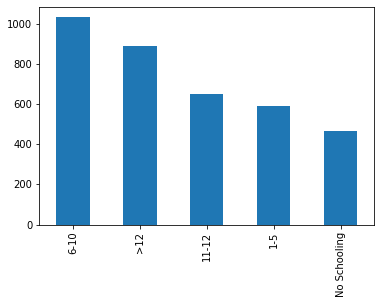

In [359]:
df_dummy_education['Education'].value_counts().plot.bar()

In [360]:
df_Fill_Null = df_dummy_education.copy()
df_Fill_Null.Education.isnull().sum()

20

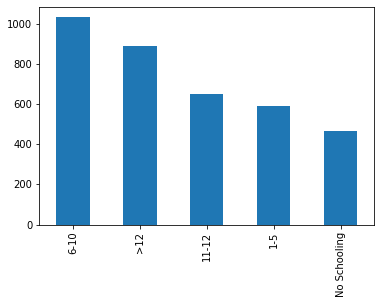

In [361]:
df_Fill_Null['Education'].value_counts().plot.bar()

In [362]:
df_Fill_Null.isnull().sum()

Address                           0
Age                               2
Sex                               1
Education                        20
Employment1                     784
Employment2                     784
Monthly Income                   29
Location                          0
Marital Status                    0
Diabetes                          4
Hypertension                      3
Chronic Kidney Disease            3
Chronic Respiratory Disease       3
Chronic Heart Disease             3
Cancer                            3
Other Disease                     3
Own House                         2
Motor Cycle                       6
Rickshaw_Van                      6
Pickup_Bus_Car                    6
Television                        2
Toilet Facilities                 2
House Material                   10
Perception_Covid19               93
Odds_infected                    92
COVID19 Infection                 3
Comply_Instruction                4
Mitigation_Measures         

In [363]:
df_Fill_Null.fillna(df_Fill_Null.mode().iloc[0])

Output hidden; open in https://colab.research.google.com to view.

In [364]:
df_Fill_Null.isnull().sum()

Address                           0
Age                               2
Sex                               1
Education                        20
Employment1                     784
Employment2                     784
Monthly Income                   29
Location                          0
Marital Status                    0
Diabetes                          4
Hypertension                      3
Chronic Kidney Disease            3
Chronic Respiratory Disease       3
Chronic Heart Disease             3
Cancer                            3
Other Disease                     3
Own House                         2
Motor Cycle                       6
Rickshaw_Van                      6
Pickup_Bus_Car                    6
Television                        2
Toilet Facilities                 2
House Material                   10
Perception_Covid19               93
Odds_infected                    92
COVID19 Infection                 3
Comply_Instruction                4
Mitigation_Measures         

In [365]:
for column in df_Fill_Null.columns:
    df_Fill_Null[column].fillna(df_Fill_Null[column].mode()[0], inplace=True)

In [366]:
df_Fill_Null.isnull().sum()

Address                        0
Age                            0
Sex                            0
Education                      0
Employment1                    0
Employment2                    0
Monthly Income                 0
Location                       0
Marital Status                 0
Diabetes                       0
Hypertension                   0
Chronic Kidney Disease         0
Chronic Respiratory Disease    0
Chronic Heart Disease          0
Cancer                         0
Other Disease                  0
Own House                      0
Motor Cycle                    0
Rickshaw_Van                   0
Pickup_Bus_Car                 0
Television                     0
Toilet Facilities              0
House Material                 0
Perception_Covid19             0
Odds_infected                  0
COVID19 Infection              0
Comply_Instruction             0
Mitigation_Measures            0
Vaccine Acceptance             0
Trust_HealthSystem             0
Trust_Medi

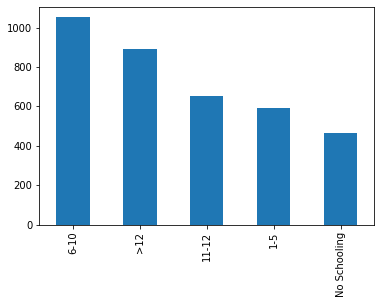

In [367]:
df_Fill_Null['Education'].value_counts().plot.bar()

In [368]:
df_Fill_Null["Education"].value_counts()

6-10            1051
>12              890
11-12            650
1-5              589
No Schooling     467
Name: Education, dtype: int64

In [369]:
df_Fill_Null.head()

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,...,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance
0,Rajshahi,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Low,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Single,31-40,No,0
1,Rajshahi,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Intend to pay,any,31-40,No,0
2,Rajshahi,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,...,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Free,Single,41-50,No,0
3,Rajshahi,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,...,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Free,Single,41-50,No,0
4,Rajshahi,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,...,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,any,<=30,No,0


In [370]:
df_lbEconding_Address = df_Fill_Null.copy()

In [371]:
from sklearn.preprocessing import LabelEncoder #LabelEncoding Categorical Data

lb_make = LabelEncoder()
df_lbEconding_Address['Address_Code'] = lb_make.fit_transform(df_lbEconding_Address['Address'])

df_lbEconding_Address.head() #Results in appending a new column to df

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,...,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance,Address_Code
0,Rajshahi,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Single,31-40,No,0,31
1,Rajshahi,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,Intend to vaccinate,High,Moderate,Completely free from side effects,Intend to pay,any,31-40,No,0,31
2,Rajshahi,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,...,Intend to vaccinate,High,Low,Completely free from side effects,Free,Single,41-50,No,0,31
3,Rajshahi,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,...,Intend to vaccinate,High,Moderate,Completely free from side effects,Free,Single,41-50,No,0,31
4,Rajshahi,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,...,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,any,<=30,No,0,31


In [372]:
df_Address_Code = df_lbEconding_Address.copy() #copied to a new dataframe

# shift column 'Address_Code' to second position
second_column = df_Address_Code.pop('Address_Code')
  
# insert column using insert(position,column_name, first_column) function
df_Address_Code.insert(1, 'Address_Code', second_column)


In [373]:
df_Address_Code.head()

,Address,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,...,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance
0,Rajshahi,31,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,Low,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Single,31-40,No,0
1,Rajshahi,31,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Intend to pay,any,31-40,No,0
2,Rajshahi,31,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,...,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Free,Single,41-50,No,0
3,Rajshahi,31,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,...,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Free,Single,41-50,No,0
4,Rajshahi,31,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,...,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,any,<=30,No,0


In [374]:
df_Address_Code.Address_Code.unique()

array([31, 32,  4, 12, 26, 19, 16,  7,  5, 28,  1, 18,  3, 23,  6, 17, 11,
       34, 27, 20,  0,  8, 24, 22, 14, 35, 13,  9, 39, 15, 43, 41, 42, 45,
       44, 40, 30, 21, 33,  2, 10, 38, 36, 37, 25, 29])

In [375]:
df.Adverse_Vaccine.value_counts()

Completely free from side effects                         1655
Safe and low free from side effects                        426
As a new vaccine, its side effects are not certain         219
3 | As a new vaccine, its side effects are not certain     124
2 | Safe and low free from side effects                    108
2.safe and                                                   4
3.as a new                                                   2
1.complet                                                    1
3.as a new3.500-1000                                         1
3.as anew                                                    1
3|as a new                                                   1
Name: Adverse_Vaccine, dtype: int64

In [376]:
df_lbEconding_Categories = df_Address_Code.copy()
df_lbEconding_AllCategories = df_Address_Code.copy()


lb_make = LabelEncoder()
df_lbEconding_AllCategories['Sex_code'] = lb_make.fit_transform(df_lbEconding_Categories['Sex'])
df_lbEconding_AllCategories['Employment1_code'] = lb_make.fit_transform(df_lbEconding_Categories['Employment1'])
df_lbEconding_AllCategories['Employment2_code'] = lb_make.fit_transform(df_lbEconding_Categories['Employment2'])
df_lbEconding_AllCategories['Location_code'] = lb_make.fit_transform(df_lbEconding_Categories['Location'])
df_lbEconding_AllCategories['Marital Status_code'] = lb_make.fit_transform(df_lbEconding_Categories['Marital Status'])
df_lbEconding_AllCategories['Diabetes_code'] = lb_make.fit_transform(df_lbEconding_Categories['Diabetes'])
df_lbEconding_AllCategories['Hypertension_code'] = lb_make.fit_transform(df_lbEconding_Categories['Hypertension'])
df_lbEconding_AllCategories['Chronic Kidney Disease_code'] = lb_make.fit_transform(df_lbEconding_Categories['Chronic Kidney Disease'])
df_lbEconding_AllCategories['Chronic Respiratory Disease_code'] = lb_make.fit_transform(df_lbEconding_Categories['Chronic Respiratory Disease'])
df_lbEconding_AllCategories['Chronic Heart Disease_code'] = lb_make.fit_transform(df_lbEconding_Categories['Chronic Heart Disease'])
df_lbEconding_AllCategories['Cancer_code'] = lb_make.fit_transform(df_lbEconding_Categories['Cancer'])
df_lbEconding_AllCategories['Other Disease_code'] = lb_make.fit_transform(df_lbEconding_Categories['Other Disease'])
df_lbEconding_AllCategories['Perception_Covid19_code'] = lb_make.fit_transform(df_lbEconding_Categories['Perception_Covid19'])
df_lbEconding_AllCategories['Odds_infected_code'] = lb_make.fit_transform(df_lbEconding_Categories['Odds_infected'])
df_lbEconding_AllCategories['COVID19 Infection_code'] = lb_make.fit_transform(df_lbEconding_Categories['COVID19 Infection'])
df_lbEconding_AllCategories['Comply_Instruction_code'] = lb_make.fit_transform(df_lbEconding_Categories['Comply_Instruction'])
df_lbEconding_AllCategories['Mitigation_Measures_code'] = lb_make.fit_transform(df_lbEconding_Categories['Mitigation_Measures'])
df_lbEconding_AllCategories['Vaccine Acceptance_code'] = lb_make.fit_transform(df_lbEconding_Categories['Vaccine Acceptance'])
df_lbEconding_AllCategories['Trust_HealthSystem_code'] = lb_make.fit_transform(df_lbEconding_Categories['Trust_HealthSystem'])
df_lbEconding_AllCategories['Trust_Media_code'] = lb_make.fit_transform(df_lbEconding_Categories['Trust_Media'])
df_lbEconding_AllCategories['Adverse_Vaccine_code'] = lb_make.fit_transform(df_lbEconding_Categories['Adverse_Vaccine'])
df_lbEconding_AllCategories['Payment_code'] = lb_make.fit_transform(df_lbEconding_Categories['Payment'])
df_lbEconding_AllCategories['MaxDose Willingness_code'] = lb_make.fit_transform(df_lbEconding_Categories['MaxDose Willingness'])
df_lbEconding_AllCategories['Comorbidity_code'] = lb_make.fit_transform(df_lbEconding_Categories['Comorbidity'])
df_lbEconding_AllCategories['Education_Code'] = lb_make.fit_transform(df_lbEconding_Categories['Education'])
df_lbEconding_AllCategories['AgeGroup_Code'] = lb_make.fit_transform(df_lbEconding_Categories['AgeGroup'])



df_lbEconding_AllCategories.head() #Results in appending new columns to df

,Address,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,...,Mitigation_Measures_code,Vaccine Acceptance_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_Code,AgeGroup_Code
0,Rajshahi,31,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,1,0,0,1,9,1,8,0,1,0
1,Rajshahi,31,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,2,0,0,2,9,1,10,0,1,0
2,Rajshahi,31,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,...,2,0,0,1,9,0,8,0,2,1
3,Rajshahi,31,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,...,2,0,0,2,9,0,8,0,0,1
4,Rajshahi,31,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,...,2,0,0,1,9,1,10,0,1,4


In [377]:
df_lbEconding_AllCategories.Adverse_Vaccine.value_counts()

Completely free from side effects                         2760
Safe and low free from side effects                        426
As a new vaccine, its side effects are not certain         219
3 | As a new vaccine, its side effects are not certain     124
2 | Safe and low free from side effects                    108
2.safe and                                                   4
3.as a new                                                   2
1.complet                                                    1
3.as a new3.500-1000                                         1
3.as anew                                                    1
3|as a new                                                   1
Name: Adverse_Vaccine, dtype: int64

In [378]:
df_Adverse_Vaccine_Cleaning=df_lbEconding_AllCategories.copy()

Cleaning the Adverse_Vaccine Coloumn:

In [379]:
df_Adverse_Vaccine_Cleaning['Adverse_Vaccine'].replace('2 | Safe and low free from side effects','Safe and low free from side effects',inplace=True)


In [380]:
df_Adverse_Vaccine_Cleaning.Adverse_Vaccine.value_counts()

Completely free from side effects                         2760
Safe and low free from side effects                        534
As a new vaccine, its side effects are not certain         219
3 | As a new vaccine, its side effects are not certain     124
2.safe and                                                   4
3.as a new                                                   2
1.complet                                                    1
3.as a new3.500-1000                                         1
3.as anew                                                    1
3|as a new                                                   1
Name: Adverse_Vaccine, dtype: int64

In [381]:
df_Adverse_Vaccine_Cleaning['Adverse_Vaccine'].replace('3 | As a new vaccine, its side effects are not certain','As a new vaccine, its side effects are not certain',inplace=True)
df_Adverse_Vaccine_Cleaning['Adverse_Vaccine'].replace('2.safe and','Safe and low free from side effects',inplace=True)
df_Adverse_Vaccine_Cleaning['Adverse_Vaccine'].replace('1.complet','Completely free from side effects',inplace=True)
df_Adverse_Vaccine_Cleaning['Adverse_Vaccine'].replace('3.as a new3.500-1000','As a new vaccine, its side effects are not certain',inplace=True)
df_Adverse_Vaccine_Cleaning['Adverse_Vaccine'].replace('3.as anew','As a new vaccine, its side effects are not certain',inplace=True)
df_Adverse_Vaccine_Cleaning['Adverse_Vaccine'].replace('3|as a new','As a new vaccine, its side effects are not certain',inplace=True)

In [382]:
df_Adverse_Vaccine_Cleaning.Adverse_Vaccine.value_counts()

Completely free from side effects                     2761
Safe and low free from side effects                    538
As a new vaccine, its side effects are not certain     346
3.as a new                                               2
Name: Adverse_Vaccine, dtype: int64

In [383]:
df_Adverse_Vaccine_Cleaning['Adverse_Vaccine'].replace('3.as a new','As a new vaccine, its side effects are not certain',inplace=True)

In [384]:
df_Adverse_Vaccine_Cleaning.Adverse_Vaccine.value_counts()

Completely free from side effects                     2761
Safe and low free from side effects                    538
As a new vaccine, its side effects are not certain     348
Name: Adverse_Vaccine, dtype: int64

In [385]:
df_lbEconding_AllCategories['Perception_Covid19'].value_counts()

Infections are increasing day by day              1648
The rate of infection is the same as before        966
The rate of infection is decreasing day by day     909
1 | Infections are increasing day by day           115
1.infection                                          6
4                                                    1
1.infectionHigh                                      1
Brick                                                1
Name: Perception_Covid19, dtype: int64

Cleaning the 'Perception_Covid19' Column:

In [386]:
df_Perception_Covid19 = df_lbEconding_AllCategories.copy()

In [387]:
df_Perception_Covid19['Perception_Covid19'].replace('1 | Infections are increasing day by day','Infections are increasing day by day',inplace=True)

In [388]:
df_Perception_Covid19.Perception_Covid19.value_counts()

Infections are increasing day by day              1763
The rate of infection is the same as before        966
The rate of infection is decreasing day by day     909
1.infection                                          6
4                                                    1
1.infectionHigh                                      1
Brick                                                1
Name: Perception_Covid19, dtype: int64

In [389]:
df_Perception_Covid19['Perception_Covid19'].replace('1.infection','Infections are increasing day by day',inplace=True)
df_Perception_Covid19['Perception_Covid19'].replace('1.infectionHigh','Infections are increasing day by day',inplace=True)
df_Perception_Covid19['Perception_Covid19'].replace('1.infection','Infections are increasing day by day',inplace=True)




In [390]:
df_Perception_Covid19.Perception_Covid19.value_counts()

Infections are increasing day by day              1770
The rate of infection is the same as before        966
The rate of infection is decreasing day by day     909
4                                                    1
Brick                                                1
Name: Perception_Covid19, dtype: int64

Dropping irrelevant rows:

In [391]:
df_Perception_Covid19.drop(df_Perception_Covid19[df_Perception_Covid19['Perception_Covid19'] == '4'].index, inplace = True)
df_Perception_Covid19.drop(df_Perception_Covid19[df_Perception_Covid19['Perception_Covid19'] == 'Brick'].index, inplace = True)

In [392]:
df_Perception_Covid19.Perception_Covid19.value_counts()

Infections are increasing day by day              1770
The rate of infection is the same as before        966
The rate of infection is decreasing day by day     909
Name: Perception_Covid19, dtype: int64

## Cleaning MaxDose Willingness Column

In [393]:
df_MaxDose = df_Perception_Covid19.copy()
df_MaxDose['MaxDose Willingness'].value_counts()

any                1413
Single              998
Any                 304
Tripple             287
Dodule dose         274
2 | Dodule dose      94
3 | Tripple          94
Double dose          87
4 | any              85
single dose           5
double dose           2
4|any                 1
2|double dos          1
Name: MaxDose Willingness, dtype: int64

In [394]:
df_MaxDose['MaxDose Willingness'].replace('any','Any',inplace=True)
df_MaxDose['MaxDose Willingness'].replace('Dodule dose','Double dose',inplace=True)
df_MaxDose['MaxDose Willingness'].replace('2 | Dodule dose','Double dose',inplace=True)
df_MaxDose['MaxDose Willingness'].replace('4 | any','Any',inplace=True)
df_MaxDose['MaxDose Willingness'].replace('single dose','Single',inplace=True)
df_MaxDose['MaxDose Willingness'].replace('double dose','Double dose',inplace=True)
df_MaxDose['MaxDose Willingness'].replace('4|any','Any',inplace=True)
df_MaxDose['MaxDose Willingness'].replace('2|double dos','Double dose',inplace=True)
df_MaxDose['MaxDose Willingness'].replace('Tripple','Triple',inplace=True)
df_MaxDose['MaxDose Willingness'].replace('3 | Tripple','Triple',inplace=True)



In [395]:
df_MaxDose['MaxDose Willingness'].value_counts()

Any            1803
Single         1003
Double dose     458
Triple          381
Name: MaxDose Willingness, dtype: int64

### Corrected (Cleaned) Dataframe:

In [396]:
df_replaced = df_Address_Code.copy()
df_replaced['MaxDose Willingness'] = df_MaxDose['MaxDose Willingness']
df_replaced['Perception_Covid19'] = df_MaxDose['Perception_Covid19']
df_replaced['Adverse_Vaccine'] = df_Adverse_Vaccine_Cleaning['Adverse_Vaccine']


In [397]:
df_corrected = df_replaced.copy()

In [398]:
df_corrected['Adverse_Vaccine'].value_counts()

Completely free from side effects                     2761
Safe and low free from side effects                    538
As a new vaccine, its side effects are not certain     348
Name: Adverse_Vaccine, dtype: int64

In [399]:
df_corrected['Perception_Covid19'].value_counts()

Infections are increasing day by day              1770
The rate of infection is the same as before        966
The rate of infection is decreasing day by day     909
Name: Perception_Covid19, dtype: int64

In [400]:
df_corrected['MaxDose Willingness'].value_counts()

Any            1803
Single         1003
Double dose     458
Triple          381
Name: MaxDose Willingness, dtype: int64

In [401]:
df_corrected.head()

,Address,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,...,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance
0,Rajshahi,31,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,Low,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Single,31-40,No,0
1,Rajshahi,31,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Intend to pay,Any,31-40,No,0
2,Rajshahi,31,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,...,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Free,Single,41-50,No,0
3,Rajshahi,31,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,...,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Free,Single,41-50,No,0
4,Rajshahi,31,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,...,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Any,<=30,No,0


### Now Label Encoding the Corrected Dataset Categorical data

In [402]:
df_lblEncoding = df_corrected.copy() 

In [403]:
lb_make = LabelEncoder()
df_lblEncoding['Sex_code'] = lb_make.fit_transform(df_lblEncoding['Sex'])
df_lblEncoding['Employment1_code'] = lb_make.fit_transform(df_lblEncoding['Employment1'])
df_lblEncoding['Employment2_code'] = lb_make.fit_transform(df_lblEncoding['Employment2'])
df_lblEncoding['Location_code'] = lb_make.fit_transform(df_lblEncoding['Location'])
df_lblEncoding['Marital Status_code'] = lb_make.fit_transform(df_lblEncoding['Marital Status'])
df_lblEncoding['Diabetes_code'] = lb_make.fit_transform(df_lblEncoding['Diabetes'])
df_lblEncoding['Hypertension_code'] = lb_make.fit_transform(df_lblEncoding['Hypertension'])
df_lblEncoding['Chronic Kidney Disease_code'] = lb_make.fit_transform(df_lblEncoding['Chronic Kidney Disease'])
df_lblEncoding['Chronic Respiratory Disease_code'] = lb_make.fit_transform(df_lblEncoding['Chronic Respiratory Disease'])
df_lblEncoding['Chronic Heart Disease_code'] = lb_make.fit_transform(df_lblEncoding['Chronic Heart Disease'])
df_lblEncoding['Cancer_code'] = lb_make.fit_transform(df_lblEncoding['Cancer'])
df_lblEncoding['Other Disease_code'] = lb_make.fit_transform(df_lblEncoding['Other Disease'])
df_lblEncoding['Perception_Covid19_code'] = lb_make.fit_transform(df_lblEncoding['Perception_Covid19'])
df_lblEncoding['Odds_infected_code'] = lb_make.fit_transform(df_lblEncoding['Odds_infected'])
df_lblEncoding['COVID19 Infection_code'] = lb_make.fit_transform(df_lblEncoding['COVID19 Infection'])
df_lblEncoding['Comply_Instruction_code'] = lb_make.fit_transform(df_lblEncoding['Comply_Instruction'])
df_lblEncoding['Mitigation_Measures_code'] = lb_make.fit_transform(df_lblEncoding['Mitigation_Measures'])
df_lblEncoding['Vaccine Acceptance_code'] = lb_make.fit_transform(df_lblEncoding['Vaccine Acceptance'])
df_lblEncoding['Trust_HealthSystem_code'] = lb_make.fit_transform(df_lblEncoding['Trust_HealthSystem'])
df_lblEncoding['Trust_Media_code'] = lb_make.fit_transform(df_lblEncoding['Trust_Media'])
df_lblEncoding['Adverse_Vaccine_code'] = lb_make.fit_transform(df_lblEncoding['Adverse_Vaccine'])
df_lblEncoding['Payment_code'] = lb_make.fit_transform(df_lblEncoding['Payment'])
df_lblEncoding['MaxDose Willingness_code'] = lb_make.fit_transform(df_lblEncoding['MaxDose Willingness'])
df_lblEncoding['Comorbidity_code'] = lb_make.fit_transform(df_lblEncoding['Comorbidity'])
df_lblEncoding['Education_Code'] = lb_make.fit_transform(df_lblEncoding['Education'])
df_lblEncoding['MonthlyIncome_Code'] = lb_make.fit_transform(df_lblEncoding['Monthly Income'])
df_lblEncoding['AgeGroup_Code'] = lb_make.fit_transform(df_lblEncoding['AgeGroup'])

In [404]:
df_lblEncoding.head()

,Address,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,...,Vaccine Acceptance_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_Code,MonthlyIncome_Code,AgeGroup_Code
0,Rajshahi,31,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,0,0,1,1,1,2,0,1,1,0
1,Rajshahi,31,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,0,0,2,1,1,0,0,1,1,0
2,Rajshahi,31,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,...,0,0,1,1,0,2,0,2,3,1
3,Rajshahi,31,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,...,0,0,2,1,0,2,0,0,0,1
4,Rajshahi,31,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,...,0,0,1,1,1,0,0,1,0,4


In [405]:
df_preprocessing_done = df_lblEncoding.copy()

## Applying KMeans Clustering:

In [406]:
from sklearn.cluster import KMeans

In [407]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [408]:
df_preprocessing_done

y_predicted = km.fit_predict(df_preprocessing_done[['Sex_code','Employment1_code','Education_Code','MonthlyIncome_Code']])
y_predicted

array([1, 1, 2, ..., 0, 0, 0], dtype=int32)

In [409]:
df_cluster = df_preprocessing_done.copy()

In [410]:
df_cluster['cluster'] = y_predicted
df_cluster.head()

,Address,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,...,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_Code,MonthlyIncome_Code,AgeGroup_Code,cluster
0,Rajshahi,31,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,0,1,1,1,2,0,1,1,0,1
1,Rajshahi,31,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,0,2,1,1,0,0,1,1,0,1
2,Rajshahi,31,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,...,0,1,1,0,2,0,2,3,1,2
3,Rajshahi,31,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,...,0,2,1,0,2,0,0,0,1,0
4,Rajshahi,31,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,...,0,1,1,1,0,0,1,0,4,0


In [411]:
df_cluster['cluster'].value_counts()

0    1378
1    1281
2     988
Name: cluster, dtype: int64

In [412]:
df_preprocessing_done.head()

,Address,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,...,Vaccine Acceptance_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_Code,MonthlyIncome_Code,AgeGroup_Code
0,Rajshahi,31,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,0,0,1,1,1,2,0,1,1,0
1,Rajshahi,31,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,0,0,2,1,1,0,0,1,1,0
2,Rajshahi,31,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,...,0,0,1,1,0,2,0,2,3,1
3,Rajshahi,31,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,...,0,0,2,1,0,2,0,0,0,1
4,Rajshahi,31,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,...,0,0,1,1,1,0,0,1,0,4


## Scaling the Columns

In [413]:
df_preprocessing_done.describe()

,Address_Code,Age,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Vaccine_Acceptance,...,Vaccine Acceptance_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_Code,MonthlyIncome_Code,AgeGroup_Code
count,3647.000000,3647.000000,3647.000000,3647.00000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,...,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000
mean,20.313134,37.369345,0.418700,0.20510,0.040307,0.038114,0.542912,0.788319,1.352070,0.339731,...,0.278037,1.120921,1.120647,1.052098,0.446120,0.991226,0.321086,1.998903,1.588703,2.180696
std,12.179049,13.909900,0.493414,0.40383,0.196705,0.191497,0.498223,0.408556,0.739517,0.628469,...,0.576575,0.903409,0.899338,0.490195,0.497157,1.091999,0.466958,1.257342,1.284647,1.698304
min,0.000000,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,26.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,29.000000,35.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,31.000000,46.000000,1.000000,0.00000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000
max,45.000000,95.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,4.000000,1.000000,4.000000,4.000000,4.000000


In [414]:
#the columns that require scaling include
# Address_Code
# Age
new_raw_data = df_preprocessing_done.copy()

scale_vars = ['Address_Code','Age']
scaler = MinMaxScaler()
new_raw_data[scale_vars] = scaler.fit_transform(new_raw_data[scale_vars])
new_raw_data.head()

,Address,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,...,Vaccine Acceptance_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_Code,MonthlyIncome_Code,AgeGroup_Code
0,Rajshahi,0.688889,0.259740,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,0,0,1,1,1,2,0,1,1,0
1,Rajshahi,0.688889,0.233766,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,...,0,0,2,1,1,0,0,1,1,0
2,Rajshahi,0.688889,0.324675,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,...,0,0,1,1,0,2,0,2,3,1
3,Rajshahi,0.688889,0.389610,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,...,0,0,2,1,0,2,0,0,0,1
4,Rajshahi,0.688889,0.155844,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,...,0,0,1,1,1,0,0,1,0,4


## Splitting the Raw Data - Hold-out validation

In [415]:
processed_data = new_raw_data.copy()
# processed_data = processed_data[['Address_Code','Age','Sex_code','Education_Code','MonthlyIncome_Code','Employment1_code','Employment2_code',
#                          'Location_code','Marital Status_code','Perception_Covid19_code','Odds_infected_code','COVID19 Infection_code',
#                          'Comply_Instruction_code','Mitigation_Measures_code','Trust_HealthSystem_code','Trust_Media_code',
#                           'Adverse_Vaccine_code','AgeGroup_Code','Vaccine Acceptance_code']]

processed_data1 = processed_data.drop(columns=['Address'])
processed_data1.head()

,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,...,Vaccine Acceptance_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_Code,MonthlyIncome_Code,AgeGroup_Code
0,0.688889,0.259740,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,0,0,1,1,1,2,0,1,1,0
1,0.688889,0.233766,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,...,0,0,2,1,1,0,0,1,1,0
2,0.688889,0.324675,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,...,0,0,1,1,0,2,0,2,3,1
3,0.688889,0.389610,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,...,0,0,2,1,0,2,0,0,0,1
4,0.688889,0.155844,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,...,0,0,1,1,1,0,0,1,0,4


In [416]:
processed_data2 = processed_data1.drop(processed_data1.loc[:, 'Sex':'Other Disease'].columns, axis = 1)
processed_data2 = processed_data2.drop(processed_data2.loc[:, 'Perception_Covid19':'Vaccine_Acceptance'].columns, axis = 1) 
processed_data2.tail() # All Coded Data

,Address_Code,Age,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Sex_code,...,Vaccine Acceptance_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_Code,MonthlyIncome_Code,AgeGroup_Code
3642,0.088889,0.051948,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,...,0,2,0,1,0,0,0,2,0,4
3643,0.088889,0.090909,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,...,0,2,2,1,0,0,0,2,0,4
3644,0.088889,0.233766,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,...,0,0,0,1,0,0,0,4,3,0
3645,0.088889,0.181818,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,...,0,2,2,1,0,0,0,0,0,0
3646,0.088889,0.090909,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0,...,0,0,0,1,0,0,0,4,0,4


In [417]:
X = processed_data2.drop(columns = 'Vaccine Acceptance_code').values# Input features (attributes)
y = processed_data2['Vaccine Acceptance_code'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

X shape: (3647, 35)
y shape: (3647,)


## KNN Classifier

X shape: (3647, 35)
y shape: (3647,)
K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.7506849315068493 , Difference =  24.931506849315067 %
K =  5 , Training Accuracy =  0.8211456429006703  Test Accuracy =  0.7890410958904109 , Difference =  3.210454701025933 %
K =  10 , Training Accuracy =  0.805606337599025  Test Accuracy =  0.7972602739726027 , Difference =  0.8346063626422318 %
K =  15 , Training Accuracy =  0.8001218769043267  Test Accuracy =  0.8 , Difference =  0.012187690432663434 %
K =  20 , Training Accuracy =  0.7970749542961609  Test Accuracy =  0.7945205479452054 , Difference =  0.2554406350955496 %
K =  25 , Training Accuracy =  0.795551492992078  Test Accuracy =  0.7917808219178082 , Difference =  0.377067107426976 %
K =  30 , Training Accuracy =  0.7937233394271785  Test Accuracy =  0.7890410958904109 , Difference =  0.4682243536767605 %
K =  35 , Training Accuracy =  0.7949421084704449  Test Accuracy =  0.7890410958904109 , Difference =  0.5901012580033949 %
K =  

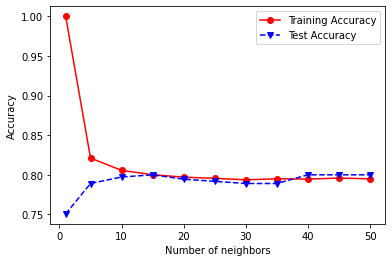

In [418]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [419]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [420]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[272  12   2]
 [ 40  14   0]
 [ 13   3   9]]
0.8082191780821918
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       286
           1       0.48      0.26      0.34        54
           2       0.82      0.36      0.50        25

    accuracy                           0.81       365
   macro avg       0.71      0.52      0.58       365
weighted avg       0.78      0.81      0.78       365



The main parameters used by a Random Forest Classifier are:

• criterion = the function used to evaluate the quality of a split.

• max_depth = maximum number of levels allowed in each tree.

• max_features = maximum number of features considered when splitting a node.

• min_samples_leaf = minimum number of samples which can be stored in a tree leaf

• min_samples_split = minimum number of samples necessary in a node to cause node splitting.

• n_estimators = number of trees in the ensemble.

In [421]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[285   1   0]
 [ 49   5   0]
 [ 21   4   0]]
0.7945205479452054
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       286
           1       0.50      0.09      0.16        54
           2       0.00      0.00      0.00        25

    accuracy                           0.79       365
   macro avg       0.43      0.36      0.35       365
weighted avg       0.70      0.79      0.72       365



##### Randomized Search Cv

In [422]:

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [423]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [424]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [425]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=120, max_features='sqrt',
                       n_estimators=1400)

In [426]:
best_random_grid=rf_randomcv.best_estimator_

In [427]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[283   1   2]
 [ 45   9   0]
 [ 19   1   5]]
Accuracy Score 0.8136986301369863
Classification report:               precision    recall  f1-score   support

           0       0.82      0.99      0.89       286
           1       0.82      0.17      0.28        54
           2       0.71      0.20      0.31        25

    accuracy                           0.81       365
   macro avg       0.78      0.45      0.49       365
weighted avg       0.81      0.81      0.76       365



#### GridSearch CV

In [428]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [120], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1200, 1300, 1400, 1500, 1600]}


In [ ]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


In [ ]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [120],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [400, 500, 600, 700, 800]},
             verbose=2)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=120, max_features='sqrt',
                       min_samples_split=3, n_estimators=800)

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=120, max_features='sqrt',
                       min_samples_split=3, n_estimators=800)

In [ ]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[282   2   2]
 [ 44  10   0]
 [ 18   1   6]]
Accuracy Score 0.8164383561643835
Classification report:               precision    recall  f1-score   support

           0       0.82      0.99      0.90       286
           1       0.77      0.19      0.30        54
           2       0.75      0.24      0.36        25

    accuracy                           0.82       365
   macro avg       0.78      0.47      0.52       365
weighted avg       0.81      0.82      0.77       365



## Finding the Best ML Model Using GridSearchCV

In [ ]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
#         'linear_regression' : {
#             'model': LinearRegression(),
#             'params': {
#                 'normalize': [True, False]
#             }
#         },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random'],
                'max_depth': range(1,25,1)
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse','mae'],
                'n_estimators': range(30,100,5)
            }
        }
#         'XGBoost': {
#             'model': XGBRegressor(objective ='reg:squarederror'),
#             'params': {
#                 'criterion' : ['mse','friedman_mse','mae'],
#                 #'objective' : 'reg:squarederror',
#                 'n_estimators': range(30,100,5),
#                 'max_depth': range(1,6,1),
#                 'eta' : [0.1,0.01],
#                 'colsample_bytree' : np.linspace(0,1,10,endpoint=False)
#             }
#         }
    }
    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

a = find_best_model_using_gridsearchcv(X,y)
a.head()

## Data Visualization

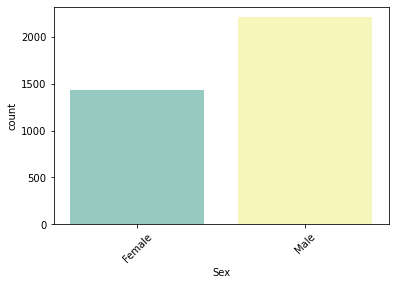

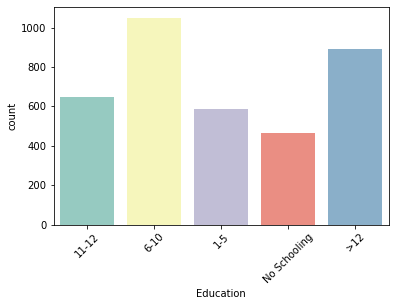

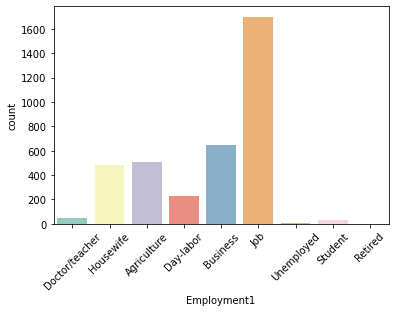

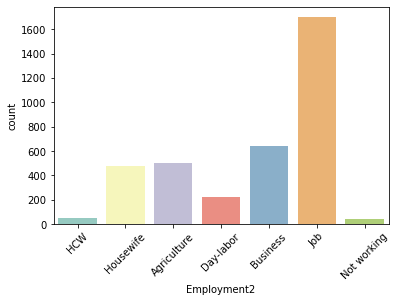

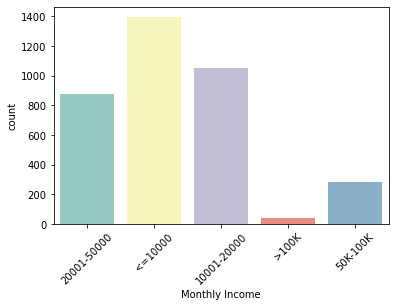

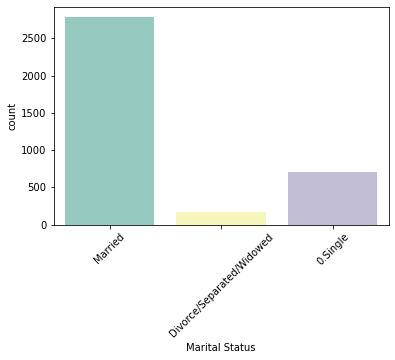

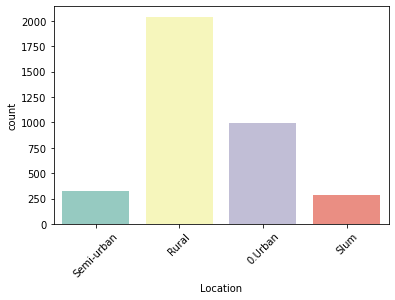

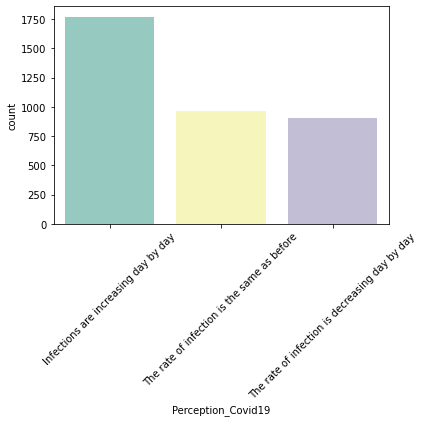

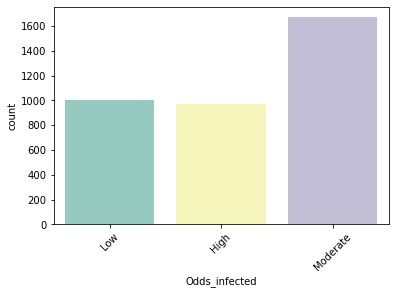

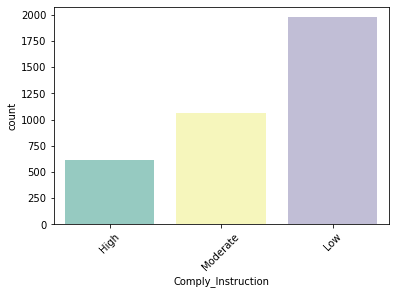

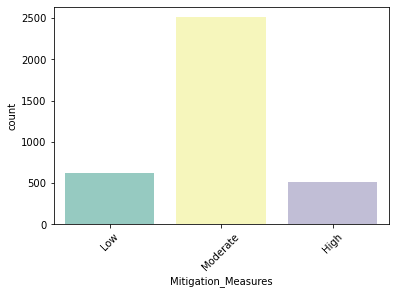

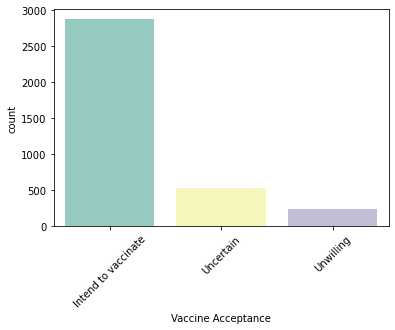

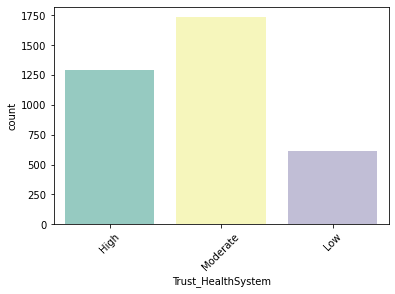

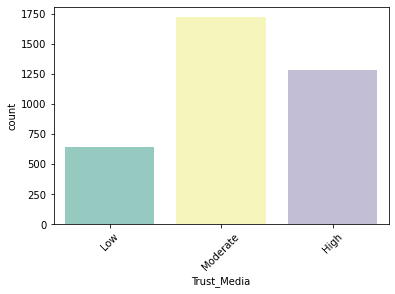

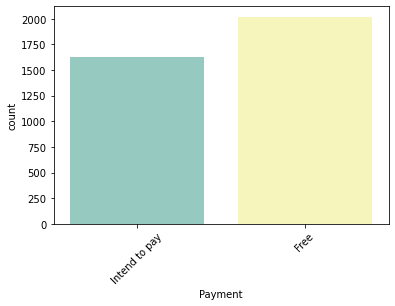

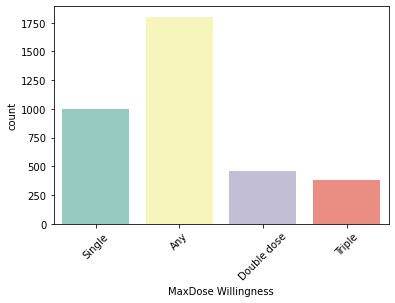

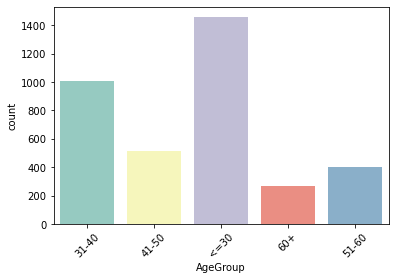

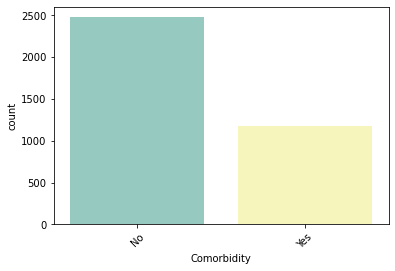

In [ ]:
 #Looping through all the features and plotting bar chart of each of the categorical features

    
features = [ 'Sex','Education', 'Employment1', 'Employment2', 'Monthly Income', 'Marital Status',
           'Location','Perception_Covid19','Odds_infected','Comply_Instruction','Mitigation_Measures','Vaccine Acceptance',
           'Trust_HealthSystem','Trust_Media','Payment', 'MaxDose Willingness', 'AgeGroup','Comorbidity']

for f in features:
    sns.countplot(x = f, data = df_preprocessing_done, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
processed_data.head()

,Address,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,Hypertension,Chronic Kidney Disease,Chronic Respiratory Disease,Chronic Heart Disease,Cancer,Other Disease,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19,Odds_infected,COVID19 Infection,Comply_Instruction,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance,Sex_code,Employment1_code,Employment2_code,Location_code,Marital Status_code,Diabetes_code,Hypertension_code,Chronic Kidney Disease_code,Chronic Respiratory Disease_code,Chronic Heart Disease_code,Cancer_code,Other Disease_code,Perception_Covid19_code,Odds_infected_code,COVID19 Infection_code,Comply_Instruction_code,Mitigation_Measures_code,Vaccine Acceptance_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_Code,MonthlyIncome_Code,AgeGroup_Code
0,Rajshahi,0.688889,0.259740,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Low,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Single,31-40,No,0,0,3,3,2,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,2,0,1,1,0
1,Rajshahi,0.688889,0.233766,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Intend to pay,Any,31-40,No,0,1,3,3,2,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,2,1,1,0,0,1,1,0
2,Rajshahi,0.688889,0.324675,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Free,Single,41-50,No,0,0,4,4,1,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,1,0,2,0,2,3,1
3,Rajshahi,0.688889,0.389610,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,Moderate,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Free,Single,41-50,No,0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,2,1,0,2,0,0,0,1
4,Rajshahi,0.688889,0.155844,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,1.0,2.0,Infections are increasing day by day,High,No,High,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Any,<=30,No,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,0,0,1,0,4


In [ ]:
Age_df = processed_data['AgeGroup'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')
Age_df.head()


,sub_cat_values,counts
0,<=30,1458
1,31-40,1006
2,41-50,512
3,51-60,404
4,60+,267


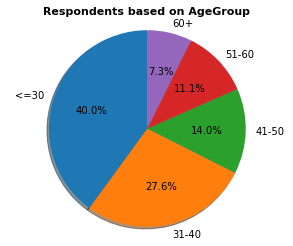

In [ ]:
# Pie chart
labels = Age_df.sub_cat_values
Age_Class = processed_data.groupby('AgeGroup').count()
sizes = Age_df.counts

fig1, ax1 = plt.subplots(figsize=[5, 4])
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on AgeGroup', fontdict={'fontsize': 11, 'fontweight': 'bold'})

# plt.legend(labels=labels)
plt.show()

In [ ]:
Edu_df = processed_data['Education'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')

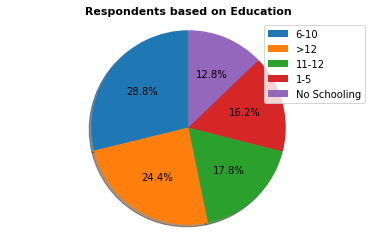

In [ ]:
labels = Edu_df.sub_cat_values
Edu_Class = processed_data.groupby('Education_Code').count()
sizes = Edu_df.counts

fig1, ax1 = plt.subplots(figsize=[6.5, 4])
ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on Education', fontdict={'fontsize': 11, 'fontweight': 'bold'})

plt.legend(labels=labels,loc="upper right")
plt.show()

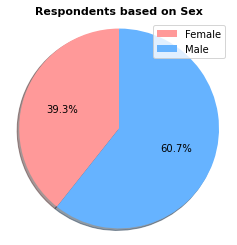

In [ ]:
labels = processed_data['Sex'].values
Gender_Class = processed_data.groupby('Sex_code').count()
sizes = Gender_Class['Sex']

fig1, ax1 = plt.subplots(figsize=[4, 4])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on Sex', fontdict={'fontsize': 11, 'fontweight': 'bold'})

plt.legend(labels=labels)
plt.show()

In [ ]:
Income = processed_data['Monthly Income'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')

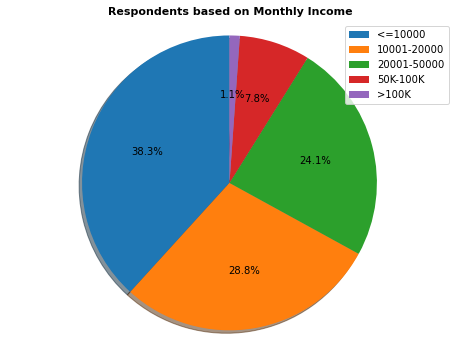

In [ ]:
labels = Income.sub_cat_values
Income_Class = processed_data.groupby('MonthlyIncome_Code').count()
sizes = Income.counts

fig1, ax1 = plt.subplots(figsize=[8,6])
ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on Monthly Income', fontdict={'fontsize': 11, 'fontweight': 'bold'})

plt.legend(labels=labels)
plt.show()

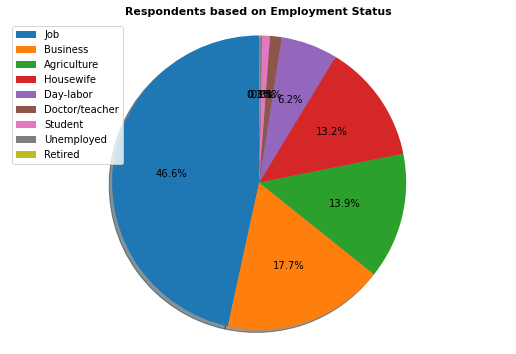

In [ ]:
Employ = processed_data['Employment1'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')

labels = Employ.sub_cat_values
Income_Class = processed_data.groupby('MonthlyIncome_Code').count()
sizes = Employ.counts

fig1, ax1 = plt.subplots(figsize=[9,6])
ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on Employment Status', fontdict={'fontsize': 11, 'fontweight': 'bold'})

plt.legend(labels=labels)
plt.show()

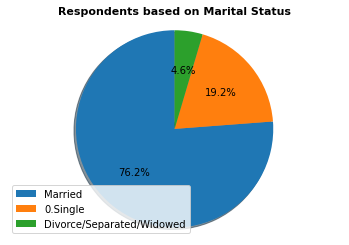

In [ ]:
Marrital_Status = processed_data['Marital Status'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')

labels = Marrital_Status.sub_cat_values
Income_Class = processed_data.groupby('MonthlyIncome_Code').count()
sizes = Marrital_Status.counts

fig1, ax1 = plt.subplots(figsize=[6, 4])
ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on Marital Status', fontdict={'fontsize': 11, 'fontweight': 'bold'})

plt.legend(labels=labels)
plt.show()

In [ ]:
df_preprocessing_done.head()

,Address,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,Hypertension,Chronic Kidney Disease,Chronic Respiratory Disease,Chronic Heart Disease,Cancer,Other Disease,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19,Odds_infected,COVID19 Infection,Comply_Instruction,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance,Sex_code,Employment1_code,Employment2_code,Location_code,Marital Status_code,Diabetes_code,Hypertension_code,Chronic Kidney Disease_code,Chronic Respiratory Disease_code,Chronic Heart Disease_code,Cancer_code,Other Disease_code,Perception_Covid19_code,Odds_infected_code,COVID19 Infection_code,Comply_Instruction_code,Mitigation_Measures_code,Vaccine Acceptance_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_Code,MonthlyIncome_Code,AgeGroup_Code
0,Rajshahi,31,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Low,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Single,31-40,No,0,0,3,3,2,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,2,0,1,1,0
1,Rajshahi,31,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Intend to pay,Any,31-40,No,0,1,3,3,2,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,2,1,1,0,0,1,1,0
2,Rajshahi,31,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Free,Single,41-50,No,0,0,4,4,1,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,1,0,2,0,2,3,1
3,Rajshahi,31,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,Moderate,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Free,Single,41-50,No,0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,2,1,0,2,0,0,0,1
4,Rajshahi,31,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,1.0,2.0,Infections are increasing day by day,High,No,High,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Any,<=30,No,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,0,0,1,0,4


In [ ]:
df_preprocessing_done.head()

,Address,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,Hypertension,Chronic Kidney Disease,Chronic Respiratory Disease,Chronic Heart Disease,Cancer,Other Disease,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19,Odds_infected,COVID19 Infection,Comply_Instruction,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance,Sex_code,Employment1_code,Employment2_code,Location_code,Marital Status_code,Diabetes_code,Hypertension_code,Chronic Kidney Disease_code,Chronic Respiratory Disease_code,Chronic Heart Disease_code,Cancer_code,Other Disease_code,Perception_Covid19_code,Odds_infected_code,COVID19 Infection_code,Comply_Instruction_code,Mitigation_Measures_code,Vaccine Acceptance_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_Code,MonthlyIncome_Code,AgeGroup_Code
0,Rajshahi,31,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Low,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Single,31-40,No,0,0,3,3,2,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,2,0,1,1,0
1,Rajshahi,31,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Intend to pay,Any,31-40,No,0,1,3,3,2,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,2,1,1,0,0,1,1,0
2,Rajshahi,31,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Free,Single,41-50,No,0,0,4,4,1,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,1,0,2,0,2,3,1
3,Rajshahi,31,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,Moderate,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Free,Single,41-50,No,0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,2,1,0,2,0,0,0,1
4,Rajshahi,31,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,1.0,2.0,Infections are increasing day by day,High,No,High,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Any,<=30,No,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,0,0,1,0,4


In [ ]:
df_preprocessing_done['Location'].replace('0.Urban','Urban',inplace=True)

###### BoxPlot of Vaccine Acceptancy according to Age in Different Types of Location in BD:

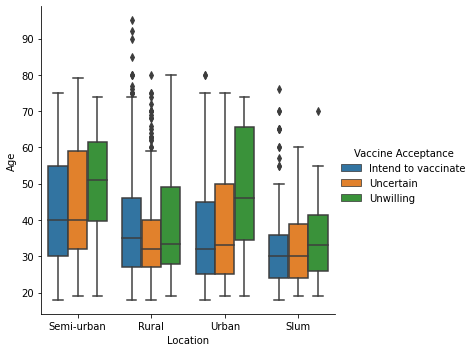

In [ ]:

ax = sns.catplot(x="Location", y="Age", hue="Vaccine Acceptance", kind="box", data=df_preprocessing_done)

###### BoxPlot of Vaccine Acceptancy according to Age for different types of Employment Status:

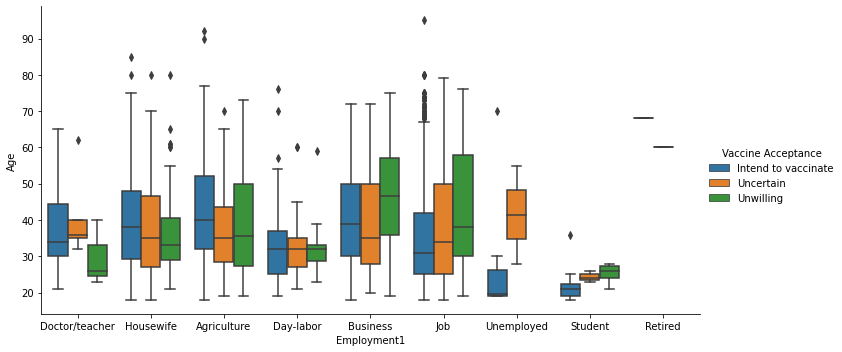

In [ ]:
ax = sns.catplot(x="Employment1", y="Age", hue="Vaccine Acceptance", kind="box", data=df_preprocessing_done, height=5, aspect=2)

###### Violinplots of Vaccine Acceptancy according to Age in based on if the Individual was Affected by Covid19 or not:

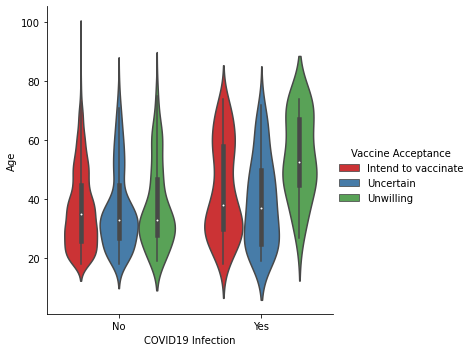

In [ ]:
sns.catplot(x="COVID19 Infection", y="Age", hue="Vaccine Acceptance",
            kind="violin", split=False, data=df_preprocessing_done, palette="Set1")

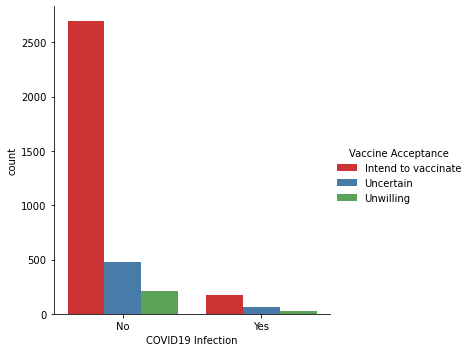

In [ ]:
sns.catplot(x="COVID19 Infection", hue="Vaccine Acceptance",
            kind="count", data=df_preprocessing_done, palette="Set1")

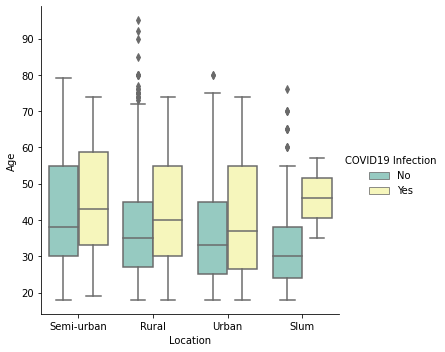

In [ ]:

sns.catplot(x="Location", y="Age", hue="COVID19 Infection",
            kind="box", data=df_preprocessing_done, palette="Set3")

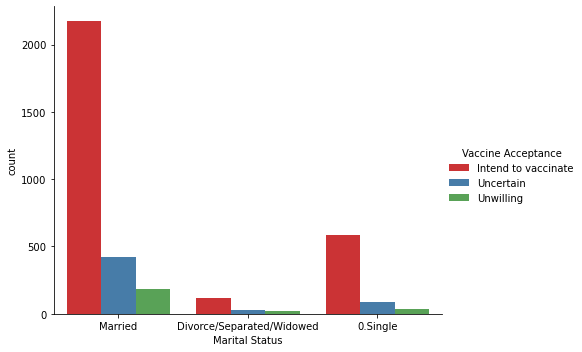

In [ ]:
sns.catplot(x="Marital Status", hue="Vaccine Acceptance",
            kind="count", data=df_preprocessing_done, palette="Set1", aspect = 1.3)

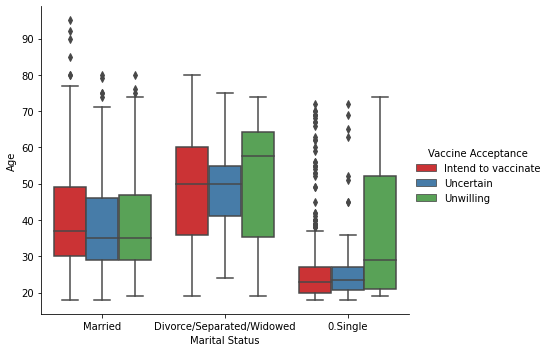

In [ ]:
sns.catplot(x="Marital Status", y="Age", hue="Vaccine Acceptance",
            kind="box",  data=df_preprocessing_done, palette="Set1", aspect = 1.2)

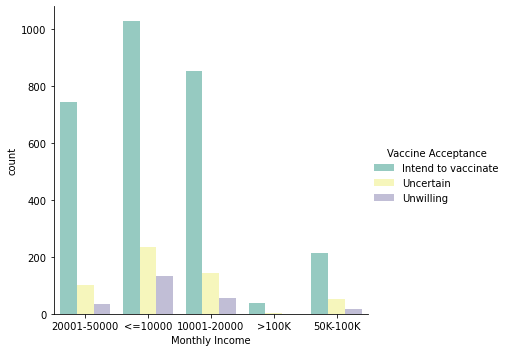

In [ ]:
sns.catplot(x="Monthly Income", hue="Vaccine Acceptance",
            kind="count", data=df_preprocessing_done, palette="Set3", aspect = 1.1)

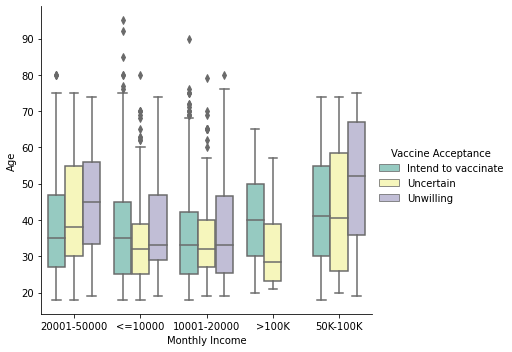

In [ ]:
sns.catplot(x="Monthly Income", y="Age", hue="Vaccine Acceptance",
            kind="box",  data=df_preprocessing_done, palette="Set3", aspect = 1.1 )

Text(0.5, 21.70625000000002, 'Odds of Being Infected')

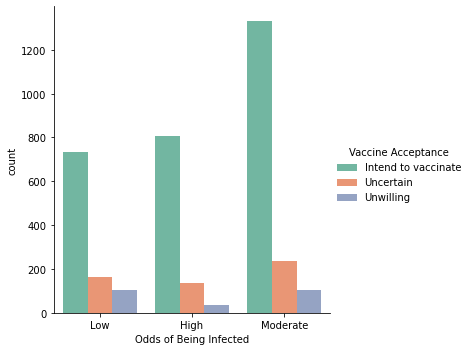

In [ ]:
sns.catplot(x="Odds_infected", hue="Vaccine Acceptance",
            kind="count", data=df_preprocessing_done, palette="Set2")
plt.xlabel('Odds of Being Infected', fontsize=10)

Text(0.5, 21.70625000000002, 'Odds of Being Infected')

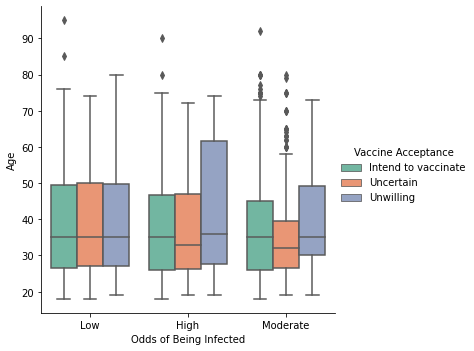

In [ ]:
sns.catplot(x="Odds_infected", y="Age", hue="Vaccine Acceptance",
            kind="box",  data=df_preprocessing_done, palette="Set2" )
plt.xlabel('Odds of Being Infected', fontsize=10)

Text(0.5, 21.70625000000002, 'How much do you comply with government instructions')

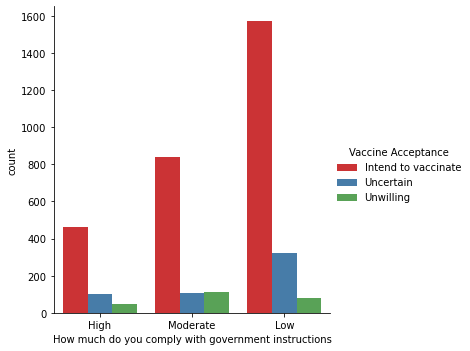

In [ ]:
sns.catplot(x="Comply_Instruction", hue="Vaccine Acceptance",
            kind="count", data=df_preprocessing_done, palette="Set1")
plt.xlabel('How much do you comply with government instructions', fontsize=10)

Text(0.5, 21.70625000000002, 'How much do you comply with government instructions')

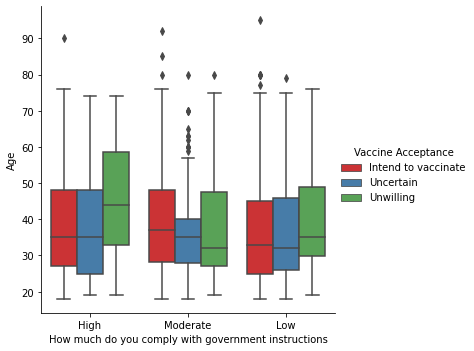

In [ ]:
sns.catplot(x="Comply_Instruction", y="Age", hue="Vaccine Acceptance",
            kind="box",  data=df_preprocessing_done, palette="Set1" )
plt.xlabel('How much do you comply with government instructions', fontsize=10)

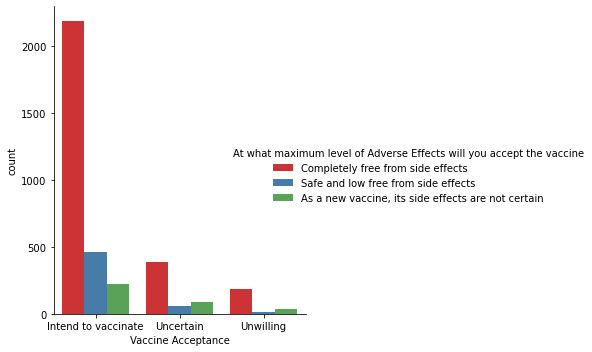

In [ ]:
g = sns.catplot(x="Vaccine Acceptance", hue="Adverse_Vaccine",
            kind="count", data=df_preprocessing_done, palette="Set1", facet_kws={'legend_out': True})
# g = plt.xlabel('At what maximum level of Adverse Effects will you accept the vaccine', fontsize=10)
# plt.legend(title='At what maximum level of Adverse Effects will you accept the vaccine', loc='right')
g.legend.set_title('At what maximum level of Adverse Effects will you accept the vaccine')
# leg = g.axes.flat[0].get_legend()
# new_title = 'At what maximum level of Adverse Effects will you accept the vaccine'
# leg.set_title(new_title)

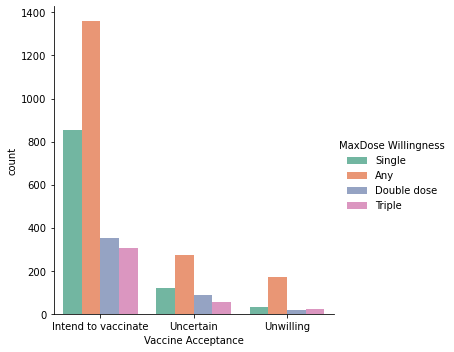

In [ ]:
sns.catplot(x="Vaccine Acceptance", hue="MaxDose Willingness",
            kind="count", data=df_preprocessing_done, palette="Set2")

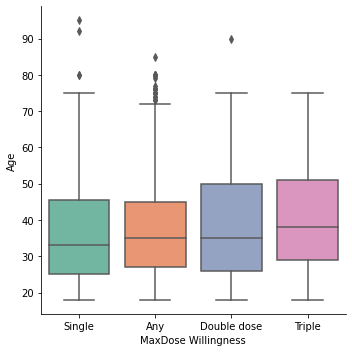

In [ ]:
sns.catplot(x="MaxDose Willingness", y="Age",
            kind="box",  data=df_preprocessing_done, palette="Set2" )

In [ ]:
df_preprocessing_done.head()

,Address,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,Hypertension,Chronic Kidney Disease,Chronic Respiratory Disease,Chronic Heart Disease,Cancer,Other Disease,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19,Odds_infected,COVID19 Infection,Comply_Instruction,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance,Sex_code,Employment1_code,Employment2_code,Location_code,Marital Status_code,Diabetes_code,Hypertension_code,Chronic Kidney Disease_code,Chronic Respiratory Disease_code,Chronic Heart Disease_code,Cancer_code,Other Disease_code,Perception_Covid19_code,Odds_infected_code,COVID19 Infection_code,Comply_Instruction_code,Mitigation_Measures_code,Vaccine Acceptance_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_Code,MonthlyIncome_Code,AgeGroup_Code
0,Rajshahi,31,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Low,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Single,31-40,No,0,0,3,3,2,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,2,0,1,1,0
1,Rajshahi,31,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Intend to pay,Any,31-40,No,0,1,3,3,2,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,2,1,1,0,0,1,1,0
2,Rajshahi,31,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Free,Single,41-50,No,0,0,4,4,1,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,1,0,2,0,2,3,1
3,Rajshahi,31,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,Moderate,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Free,Single,41-50,No,0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,2,1,0,2,0,0,0,1
4,Rajshahi,31,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,1.0,2.0,Infections are increasing day by day,High,No,High,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Any,<=30,No,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,0,0,1,0,4


In [ ]:
df_preprocessing_done['Employment1'].value_counts()

Job               1699
Business           645
Agriculture        506
Housewife          480
Day-labor          227
Doctor/teacher      47
Student             31
Unemployed          10
Retired              2
Name: Employment1, dtype: int64

###### BarPlot of Vaccine Acceptancy in different Locations of BD

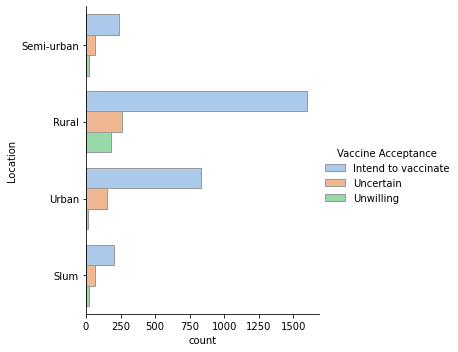

In [ ]:
sns.catplot(y="Location", hue="Vaccine Acceptance", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_preprocessing_done)

###### BarPlot of Vaccine Acceptancy according to Employment Status for different Age Group

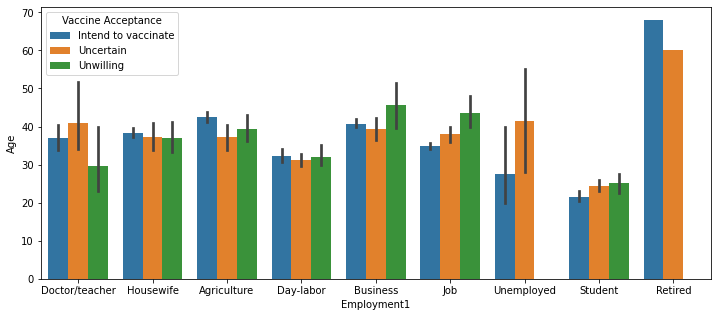

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x="Employment1", y="Age", hue="Vaccine Acceptance", data=df_preprocessing_done)

In [ ]:
df_preprocessing_done['Vaccine Acceptance'].value_counts()

Intend to vaccinate    2873
Uncertain               534
Unwilling               240
Name: Vaccine Acceptance, dtype: int64

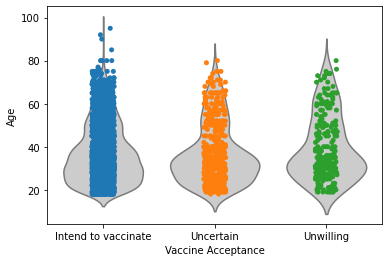

In [ ]:
ax = sns.violinplot(x="Vaccine Acceptance", y="Age", data=df_preprocessing_done, inner=None, color=".8")
ax = sns.stripplot(x="Vaccine Acceptance", y="Age", data=df_preprocessing_done)

In [ ]:
# By Vaccine Acceptance Type
plt.figure(figsize=(5,4))
sns.pairplot(df_preprocessing_done,hue = 'Vaccine Acceptance',diag_kind = "kde",kind = "scatter",palette = "husl",height= 2)
plt.show()

KeyboardInterrupt: 

<Figure size 360x288 with 0 Axes>

Error in callback <function flush_figures at 0x00000271BB14A550> (for post_execute):


KeyboardInterrupt: 

# Light Gradient Boosting Machine (LGBM)

## LightGBM

In [ ]:
df_only_label = df_lblEncoding.copy()
df_only_label.head()

,Address,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,Hypertension,Chronic Kidney Disease,Chronic Respiratory Disease,Chronic Heart Disease,Cancer,Other Disease,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19,Odds_infected,COVID19 Infection,Comply_Instruction,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance,Sex_code,Employment1_code,Employment2_code,Location_code,Marital Status_code,Diabetes_code,Hypertension_code,Chronic Kidney Disease_code,Chronic Respiratory Disease_code,Chronic Heart Disease_code,Cancer_code,Other Disease_code,Perception_Covid19_code,Odds_infected_code,COVID19 Infection_code,Comply_Instruction_code,Mitigation_Measures_code,Vaccine Acceptance_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_code,Monthly Income_code,AgeGroup_code
0,Rajshahi,31,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Low,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Single,31-40,No,0,0,3,3,2,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,2,0,1,1,0
1,Rajshahi,31,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Intend to pay,Any,31-40,No,0,1,3,3,2,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,2,1,1,0,0,1,1,0
2,Rajshahi,31,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Free,Single,41-50,No,0,0,4,4,1,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,1,0,2,0,2,3,1
3,Rajshahi,31,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,Moderate,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Free,Single,41-50,No,0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,2,1,0,2,0,0,0,1
4,Rajshahi,31,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,1.0,2.0,Infections are increasing day by day,High,No,High,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Any,<=30,No,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,0,0,1,0,4


In [ ]:
df_only_label.head()
print(len(df_only_label.columns))
# df_only_label.drop(['Address'], axis = 1, inplace = True)

65


In [ ]:
df_only_label.head()

,Address,Address_Code,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,Hypertension,Chronic Kidney Disease,Chronic Respiratory Disease,Chronic Heart Disease,Cancer,Other Disease,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19,Odds_infected,COVID19 Infection,Comply_Instruction,Mitigation_Measures,Vaccine Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine_Acceptance,Sex_code,Employment1_code,Employment2_code,Location_code,Marital Status_code,Diabetes_code,Hypertension_code,Chronic Kidney Disease_code,Chronic Respiratory Disease_code,Chronic Heart Disease_code,Cancer_code,Other Disease_code,Perception_Covid19_code,Odds_infected_code,COVID19 Infection_code,Comply_Instruction_code,Mitigation_Measures_code,Vaccine Acceptance_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,Comorbidity_code,Education_code,Monthly Income_code,AgeGroup_code
0,Rajshahi,31,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Low,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Single,31-40,No,0,0,3,3,2,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,2,0,1,1,0
1,Rajshahi,31,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Intend to pay,Any,31-40,No,0,1,3,3,2,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,2,1,1,0,0,1,1,0
2,Rajshahi,31,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Free,Single,41-50,No,0,0,4,4,1,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,1,0,2,0,2,3,1
3,Rajshahi,31,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,Moderate,Moderate,Intend to vaccinate,High,Moderate,Completely free from side effects,Free,Single,41-50,No,0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,2,1,0,2,0,0,0,1
4,Rajshahi,31,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,1.0,2.0,Infections are increasing day by day,High,No,High,Moderate,Intend to vaccinate,High,Low,Completely free from side effects,Intend to pay,Any,<=30,No,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,0,0,1,0,4


In [ ]:
#selecting only numaric columns
columns_reorder = ['Address_Code', 'Age', 'Sex_code','Education_code', 'Employment1_code', 'Employment2_code', 'Monthly Income_code','Location_code', 'Marital Status_code','Diabetes_code','Hypertension_code','Chronic Kidney Disease_code', 'Chronic Respiratory Disease_code','Chronic Heart Disease_code','Cancer_code','Other Disease_code','Own House','Motor Cycle','Rickshaw_Van','Pickup_Bus_Car','Television','Toilet Facilities','House Material','Perception_Covid19_code','Odds_infected_code','COVID19 Infection_code','Comply_Instruction_code','Mitigation_Measures_code','Trust_HealthSystem_code','Trust_Media_code','Adverse_Vaccine_code','Payment_code','MaxDose Willingness_code','AgeGroup_code','Comorbidity_code','Vaccine Acceptance_code']
df_only_label = df_only_label.reindex(columns=columns_reorder)
df_only_label.head()

,Address_Code,Age,Sex_code,Education_code,Employment1_code,Employment2_code,Monthly Income_code,Location_code,Marital Status_code,Diabetes_code,Hypertension_code,Chronic Kidney Disease_code,Chronic Respiratory Disease_code,Chronic Heart Disease_code,Cancer_code,Other Disease_code,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19_code,Odds_infected_code,COVID19 Infection_code,Comply_Instruction_code,Mitigation_Measures_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,AgeGroup_code,Comorbidity_code,Vaccine Acceptance_code
0,31,38.0,0,1,3,3,1,2,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0,1,0,0,1,0,1,1,1,2,0,0,0
1,31,36.0,1,1,3,3,1,2,2,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0,1,0,0,2,0,2,1,1,0,0,0,0
2,31,43.0,0,2,4,4,3,1,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,2,0,1,1,0,2,1,0,0
3,31,48.0,1,0,0,0,0,1,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,2,2,0,2,1,0,2,1,0,0
4,31,30.0,0,1,2,2,0,2,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0,0,0,0,2,0,1,1,1,0,4,0,0


## SCALING FOR LGBM


In [ ]:
scale_vars = ['Address_Code','Age']
scaler = MinMaxScaler()
df_only_label[scale_vars] = scaler.fit_transform(df_only_label[scale_vars])
df_only_label.head()

,Address_Code,Age,Sex_code,Education_code,Employment1_code,Employment2_code,Monthly Income_code,Location_code,Marital Status_code,Diabetes_code,Hypertension_code,Chronic Kidney Disease_code,Chronic Respiratory Disease_code,Chronic Heart Disease_code,Cancer_code,Other Disease_code,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19_code,Odds_infected_code,COVID19 Infection_code,Comply_Instruction_code,Mitigation_Measures_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,AgeGroup_code,Comorbidity_code,Vaccine Acceptance_code
0,0.688889,0.259740,0,1,3,3,1,2,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0,1,0,0,1,0,1,1,1,2,0,0,0
1,0.688889,0.233766,1,1,3,3,1,2,2,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0,1,0,0,2,0,2,1,1,0,0,0,0
2,0.688889,0.324675,0,2,4,4,3,1,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,2,0,1,1,0,2,1,0,0
3,0.688889,0.389610,1,0,0,0,0,1,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,2,2,0,2,1,0,2,1,0,0
4,0.688889,0.155844,0,1,2,2,0,2,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0,0,0,0,2,0,1,1,1,0,4,0,0


##Feature Selection with Pearson's correlation Idea



In [ ]:
df_only_label.dropna(inplace = True)
print(df_only_label.shape)

(3647, 36)


In [ ]:
df_only_label.columns

Index(['Address_Code', 'Age', 'Sex_code', 'Education_code', 'Employment1_code',
       'Employment2_code', 'Monthly Income_code', 'Location_code',
       'Marital Status_code', 'Diabetes_code', 'Hypertension_code',
       'Chronic Kidney Disease_code', 'Chronic Respiratory Disease_code',
       'Chronic Heart Disease_code', 'Cancer_code', 'Other Disease_code',
       'Own House', 'Motor Cycle', 'Rickshaw_Van', 'Pickup_Bus_Car',
       'Television', 'Toilet Facilities', 'House Material',
       'Perception_Covid19_code', 'Odds_infected_code',
       'COVID19 Infection_code', 'Comply_Instruction_code',
       'Mitigation_Measures_code', 'Trust_HealthSystem_code',
       'Trust_Media_code', 'Adverse_Vaccine_code', 'Payment_code',
       'MaxDose Willingness_code', 'AgeGroup_code', 'Comorbidity_code',
       'Vaccine Acceptance_code'],
      dtype='object')

In [ ]:
y = df_only_label['Vaccine Acceptance_code']
X = df_only_label.drop(columns = 'Vaccine Acceptance_code')

In [ ]:
X.head()

,Address_Code,Age,Sex_code,Education_code,Employment1_code,Employment2_code,Monthly Income_code,Location_code,Marital Status_code,Diabetes_code,Hypertension_code,Chronic Kidney Disease_code,Chronic Respiratory Disease_code,Chronic Heart Disease_code,Cancer_code,Other Disease_code,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19_code,Odds_infected_code,COVID19 Infection_code,Comply_Instruction_code,Mitigation_Measures_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,AgeGroup_code,Comorbidity_code
0,0.688889,0.259740,0,1,3,3,1,2,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0,1,0,0,1,0,1,1,1,2,0,0
1,0.688889,0.233766,1,1,3,3,1,2,2,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0,1,0,0,2,0,2,1,1,0,0,0
2,0.688889,0.324675,0,2,4,4,3,1,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,2,0,1,1,0,2,1,0
3,0.688889,0.389610,1,0,0,0,0,1,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,2,2,0,2,1,0,2,1,0
4,0.688889,0.155844,0,1,2,2,0,2,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0,0,0,0,2,0,1,1,1,0,4,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Vaccine Acceptance_code, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
X_train.head()

,Address_Code,Age,Sex_code,Education_code,Employment1_code,Employment2_code,Monthly Income_code,Location_code,Marital Status_code,Diabetes_code,Hypertension_code,Chronic Kidney Disease_code,Chronic Respiratory Disease_code,Chronic Heart Disease_code,Cancer_code,Other Disease_code,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19_code,Odds_infected_code,COVID19 Infection_code,Comply_Instruction_code,Mitigation_Measures_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,AgeGroup_code,Comorbidity_code
2493,0.088889,0.025974,0,4,5,5,0,3,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1,0,0,0,2,0,1,0,2,4,0
1256,0.111111,0.675325,1,1,5,5,1,1,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1,0,0,1,2,1,1,1,0,0,3,0
480,0.688889,0.350649,1,1,0,0,3,1,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,2,0,2,2,2,1,1,1,3,1,0
302,0.711111,0.181818,1,4,2,2,3,1,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,0,1,1,0,0,1,0,0,0,0
613,0.688889,0.350649,0,0,4,4,3,1,2,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,2,0,2,2,2,2,1,1,0,1,1


In [ ]:
corr = X_train.corr()
corr


,Address_Code,Age,Sex_code,Education_code,Employment1_code,Employment2_code,Monthly Income_code,Location_code,Marital Status_code,Diabetes_code,Hypertension_code,Chronic Kidney Disease_code,Chronic Respiratory Disease_code,Chronic Heart Disease_code,Cancer_code,Other Disease_code,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19_code,Odds_infected_code,COVID19 Infection_code,Comply_Instruction_code,Mitigation_Measures_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,AgeGroup_code,Comorbidity_code
Address_Code,1.000000,-0.003419,0.080481,-0.108525,-0.219958,-0.226009,0.012170,-0.127845,0.112283,-0.032671,-0.106425,-0.080135,-0.013308,-0.087032,-0.063887,-0.110878,0.558481,0.034556,0.009925,-0.088094,-0.106483,-0.184522,-0.265236,-0.074677,0.106625,-0.093969,0.398012,0.035563,0.053361,-0.088232,-0.019951,-0.164492,-0.141088,-0.046898,-0.061590
Age,-0.003419,1.000000,0.040538,-0.011641,-0.161248,-0.157813,0.002201,-0.003319,0.354163,0.285223,0.373999,0.219520,0.157034,0.216534,0.116359,0.105973,0.085675,0.047160,0.005601,0.105267,0.009331,-0.010754,-0.042783,0.020150,-0.012622,0.123357,0.012273,-0.007807,0.004341,0.064031,-0.064529,0.107959,0.038749,-0.348788,0.447328
Sex_code,0.080481,0.040538,1.000000,0.051328,-0.318738,-0.323360,-0.047817,-0.106430,-0.062605,-0.016224,-0.047102,-0.036714,-0.009016,-0.049806,-0.047304,-0.040235,-0.007504,0.223149,0.069453,-0.013429,0.024440,-0.027276,0.046894,0.015798,-0.012767,-0.001673,-0.009006,-0.063951,0.033797,0.009043,0.061422,-0.050355,-0.007123,-0.009779,-0.030827
Education_code,-0.108525,-0.011641,0.051328,1.000000,0.058692,0.058881,-0.010320,-0.013838,0.026673,0.011472,-0.019615,-0.026136,-0.033784,-0.031840,-0.029115,-0.022323,-0.127168,0.032805,0.037051,-0.031314,0.005300,0.109182,0.122458,0.034897,-0.009277,-0.022008,-0.104759,-0.036106,0.027515,-0.027532,0.013646,0.020661,-0.008639,-0.065919,0.002308
Employment1_code,-0.219958,-0.161248,-0.318738,0.058692,1.000000,0.997871,-0.061770,-0.010290,-0.251123,0.002249,-0.000653,0.033291,-0.003783,0.024842,-0.004034,0.055835,-0.242347,-0.024094,-0.076684,-0.028897,0.061586,0.125364,0.183803,0.052103,-0.099581,0.061576,-0.174098,-0.003519,-0.081639,0.019138,0.032796,0.142253,0.082579,0.144185,-0.010185
Employment2_code,-0.226009,-0.157813,-0.323360,0.058881,0.997871,1.000000,-0.066349,-0.011853,-0.243712,0.003870,0.002042,0.035211,-0.002868,0.024801,-0.003062,0.057443,-0.251462,-0.021868,-0.076199,-0.027923,0.063004,0.127438,0.190916,0.057038,-0.102623,0.064145,-0.179174,-0.005362,-0.081933,0.019988,0.033924,0.145381,0.086398,0.139639,-0.007132
Monthly Income_code,0.012170,0.002201,-0.047817,-0.010320,-0.061770,-0.066349,1.000000,0.072423,0.000705,-0.059688,-0.044788,-0.015143,-0.005884,-0.014522,-0.025606,-0.030131,0.057742,-0.175303,0.032231,0.044825,-0.103633,-0.165167,-0.237372,-0.059753,-0.004478,-0.017112,0.052825,0.043526,-0.016617,0.014180,-0.019544,-0.166671,-0.028499,0.014632,-0.048644
Location_code,-0.127845,-0.003319,-0.106430,-0.013838,-0.010290,-0.011853,0.072423,1.000000,0.109414,-0.059639,-0.040482,0.061843,0.027398,0.085873,0.018768,0.008178,0.043187,-0.112120,0.057892,-0.042372,-0.196128,-0.082504,-0.227528,-0.120636,0.104743,-0.008286,-0.091386,0.025647,-0.029634,-0.081405,-0.073276,-0.147293,-0.109694,-0.018794,-0.011401
Marital Status_code,0.112283,0.354163,-0.062605,0.026673,-0.251123,-0.243712,0.000705,0.109414,1.000000,0.042229,0.091311,-0.058247,-0.064546,-0.000293,-0.059330,-0.131625,0.158816,0.026998,-0.025734,-0.017251,-0.026076,-0.035826,-0.084103,-0.094838,0.076347,-0.104312,0.117601,0.068352,0.069327,-0.021627,-0.036026,-0.018527,-0.112288,-0.396452,0.096199
Diabetes_code,-0.032671,0.285223,-0.016224,0.011472,0.002249,0.003870,-0.059688,-0.059639,0.042229,1.000000,0.175703,0.186429,0.120888,0.162524,0.135371,0.152229,0.016757,0.124458,0.056451,0.090047,0.027503,0.064297,0.089276,0.053634,-0.

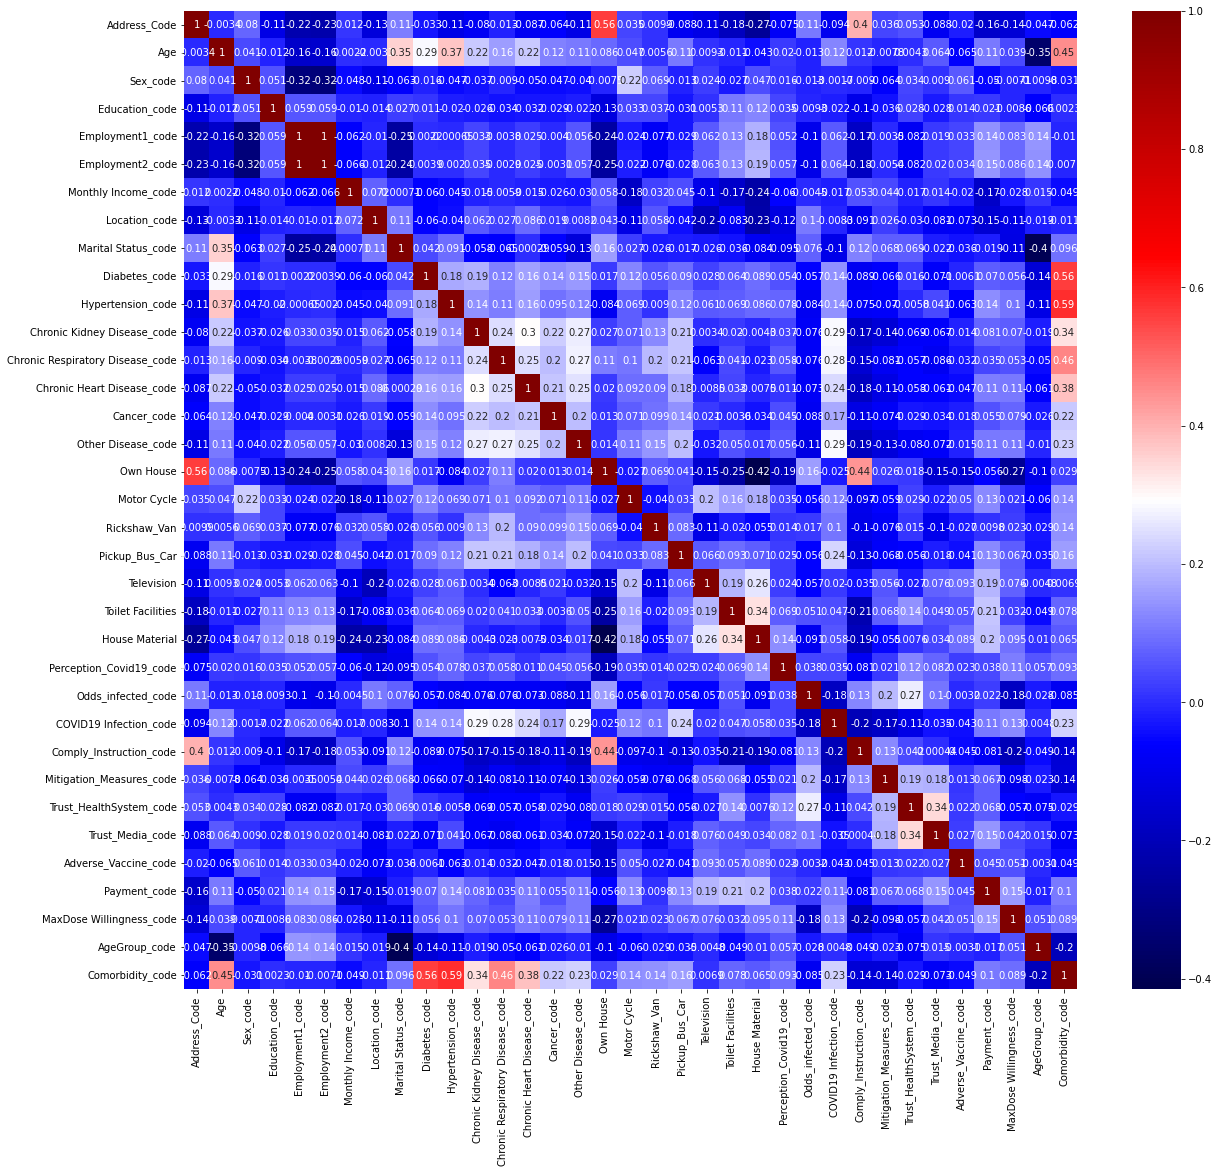

In [ ]:
plt.figure(figsize = (20,18))
sns.heatmap(corr, annot = True, cmap = "seismic");

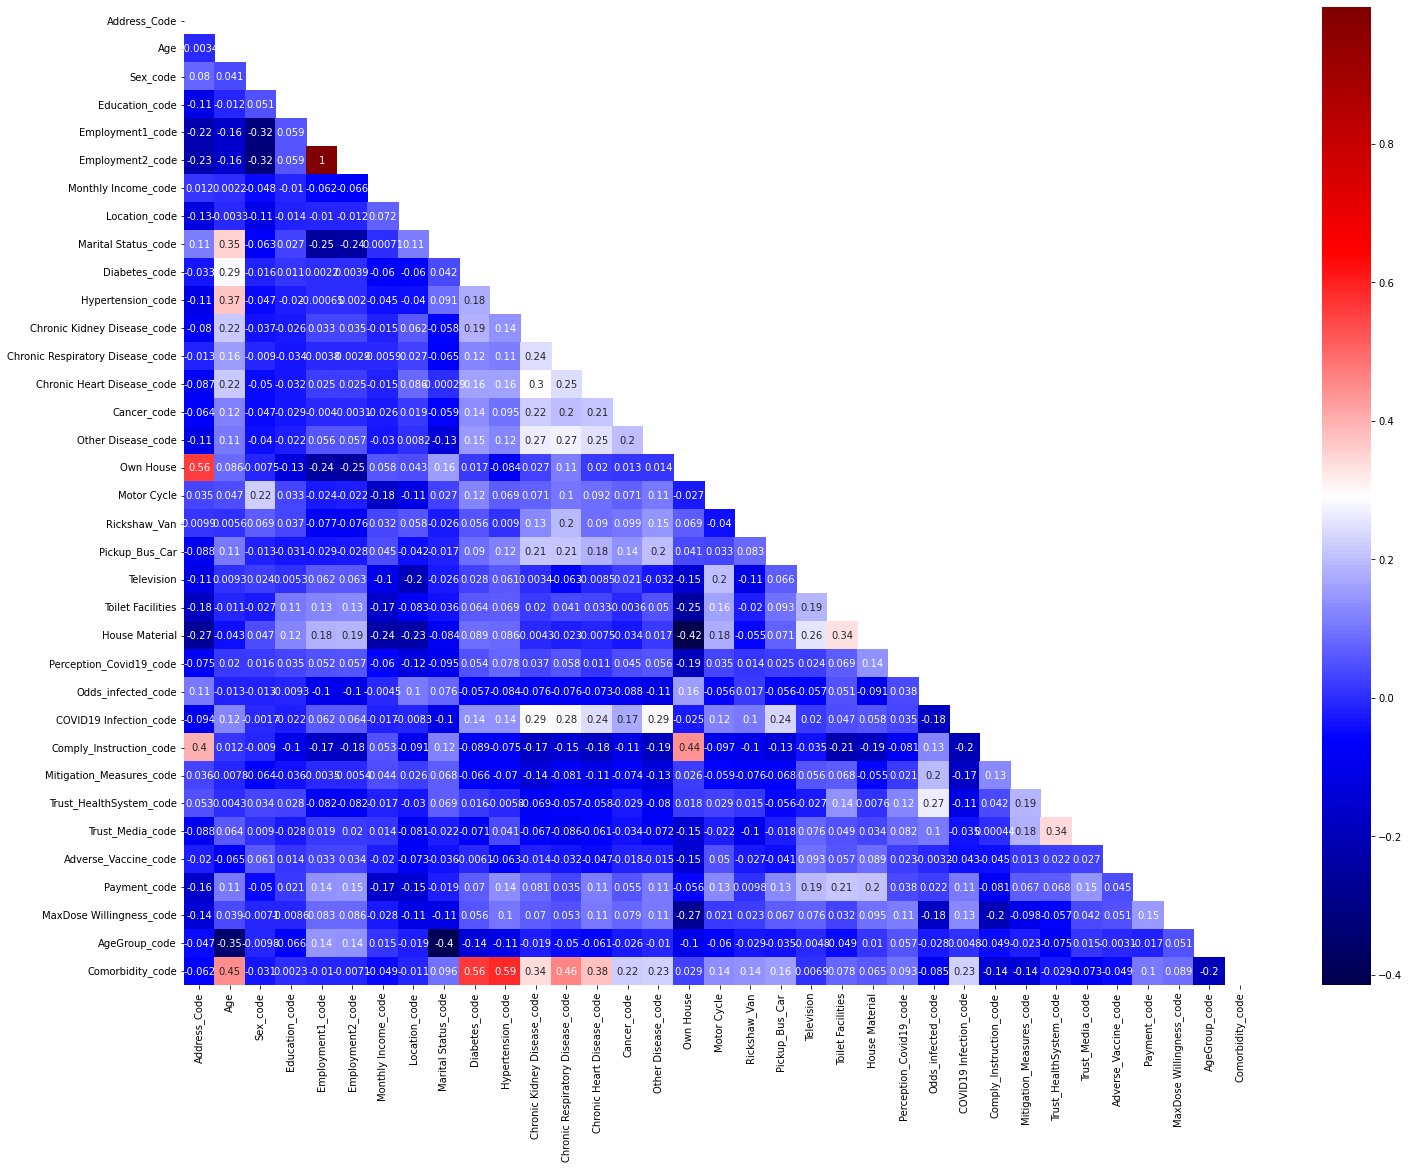

In [ ]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (24,18))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if(abs(corr_matrix.iloc[i, j])) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [ ]:
corr_features = correlation(X_train, 0.85) # already .9, .8, .7 and .6 have chacked, there is corr 
print(len(corr_features))
print(corr_features)

1
{'Employment2_code'}


In [ ]:
X_train.drop(columns = 'Employment2_code', inplace = True)

In [ ]:
X_test.drop(columns = 'Employment2_code', inplace = True)

In [ ]:
X_train.head()

,Address_Code,Age,Sex_code,Education_code,Employment1_code,Monthly Income_code,Location_code,Marital Status_code,Diabetes_code,Hypertension_code,Chronic Kidney Disease_code,Chronic Respiratory Disease_code,Chronic Heart Disease_code,Cancer_code,Other Disease_code,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19_code,Odds_infected_code,COVID19 Infection_code,Comply_Instruction_code,Mitigation_Measures_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,AgeGroup_code,Comorbidity_code
2493,0.088889,0.025974,0,4,5,0,3,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1,0,0,0,2,0,1,0,2,4,0
1256,0.111111,0.675325,1,1,5,1,1,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1,0,0,1,2,1,1,1,0,0,3,0
480,0.688889,0.350649,1,1,0,3,1,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,2,0,2,2,2,1,1,1,3,1,0
302,0.711111,0.181818,1,4,2,3,1,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,0,1,1,0,0,1,0,0,0,0
613,0.688889,0.350649,0,0,4,3,1,2,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,2,0,2,2,2,2,1,1,0,1,1


In [ ]:
X_test.head()

,Address_Code,Age,Sex_code,Education_code,Employment1_code,Monthly Income_code,Location_code,Marital Status_code,Diabetes_code,Hypertension_code,Chronic Kidney Disease_code,Chronic Respiratory Disease_code,Chronic Heart Disease_code,Cancer_code,Other Disease_code,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19_code,Odds_infected_code,COVID19 Infection_code,Comply_Instruction_code,Mitigation_Measures_code,Trust_HealthSystem_code,Trust_Media_code,Adverse_Vaccine_code,Payment_code,MaxDose Willingness_code,AgeGroup_code,Comorbidity_code
3571,0.088889,0.103896,0,2,4,3,3,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,2,0,2,2,0,0,1,0,0,4,0
1735,0.111111,0.025974,1,1,5,3,1,2,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1,1,0,1,2,1,2,1,1,2,4,0
163,0.711111,0.090909,1,4,2,3,1,2,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2,2,0,1,1,2,0,1,0,0,4,0
2248,0.244444,0.519481,0,2,5,1,0,2,1,1,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0,0,0,1,2,1,2,1,1,2,2,1
3095,0.088889,0.389610,0,2,5,1,0,2,0,1,1,1,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,1,1,1,1,0,1,1,0,1,2,1,1


In [ ]:
print(X_train.shape)

(2917, 34)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2917, 34), (730, 34), (2917,), (730,))

## LIGHT BGM MODEL

In [ ]:
import lightgbm
from sklearn import metrics
from sklearn.metrics import precision_score

In [ ]:
model = lightgbm.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 0.416768	training's multi_logloss: 0.416768	valid_0's multi_logloss: 0.569056	valid_0's multi_logloss: 0.569056
[40]	training's multi_logloss: 0.329098	training's multi_logloss: 0.329098	valid_0's multi_logloss: 0.560255	valid_0's multi_logloss: 0.560255
[60]	training's multi_logloss: 0.272761	training's multi_logloss: 0.272761	valid_0's multi_logloss: 0.566348	valid_0's multi_logloss: 0.566348
[80]	training's multi_logloss: 0.229872	training's multi_logloss: 0.229872	valid_0's multi_logloss: 0.577089	valid_0's multi_logloss: 0.577089
[100]	training's multi_logloss: 0.195304	training's multi_logloss: 0.195304	valid_0's multi_logloss: 0.583644	valid_0's multi_logloss: 0.583644


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9496
Testing accuracy 0.7808


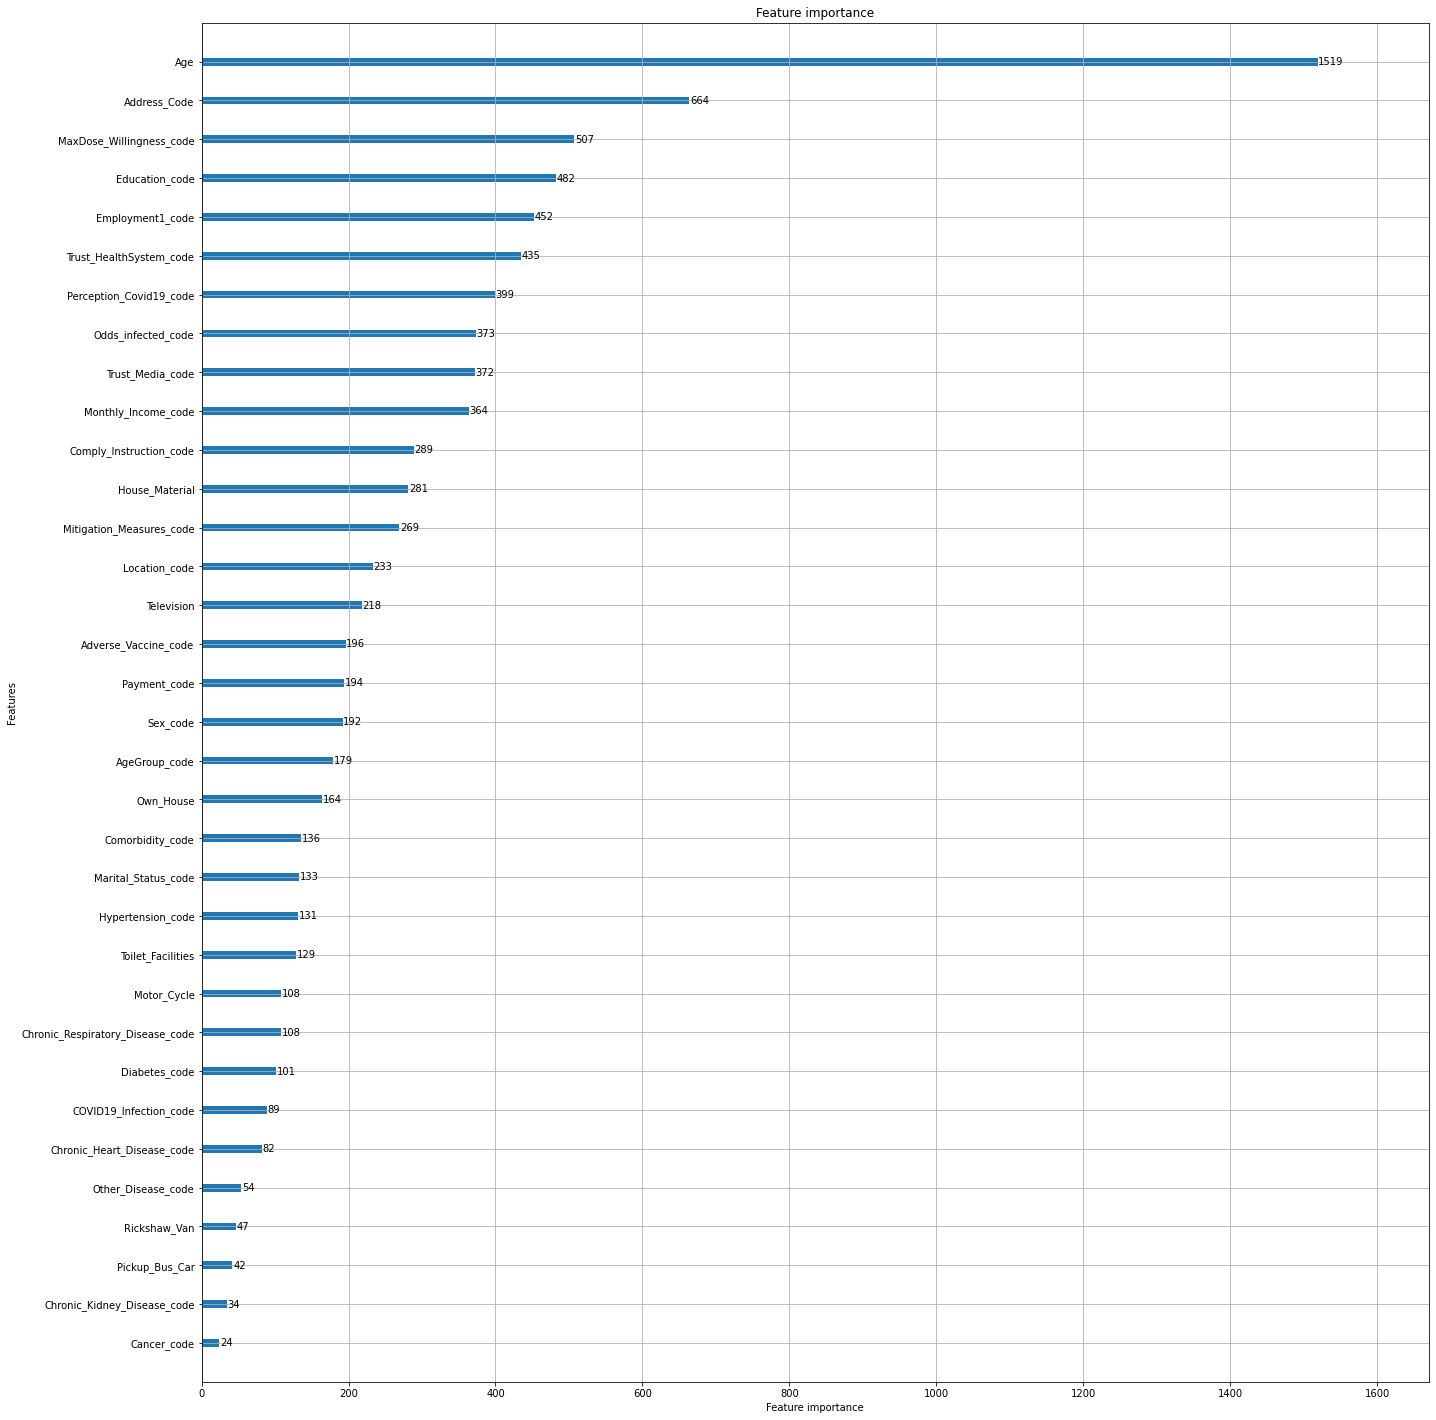

In [ ]:
lightgbm.plot_importance(model).figure.set_size_inches(22, 25)

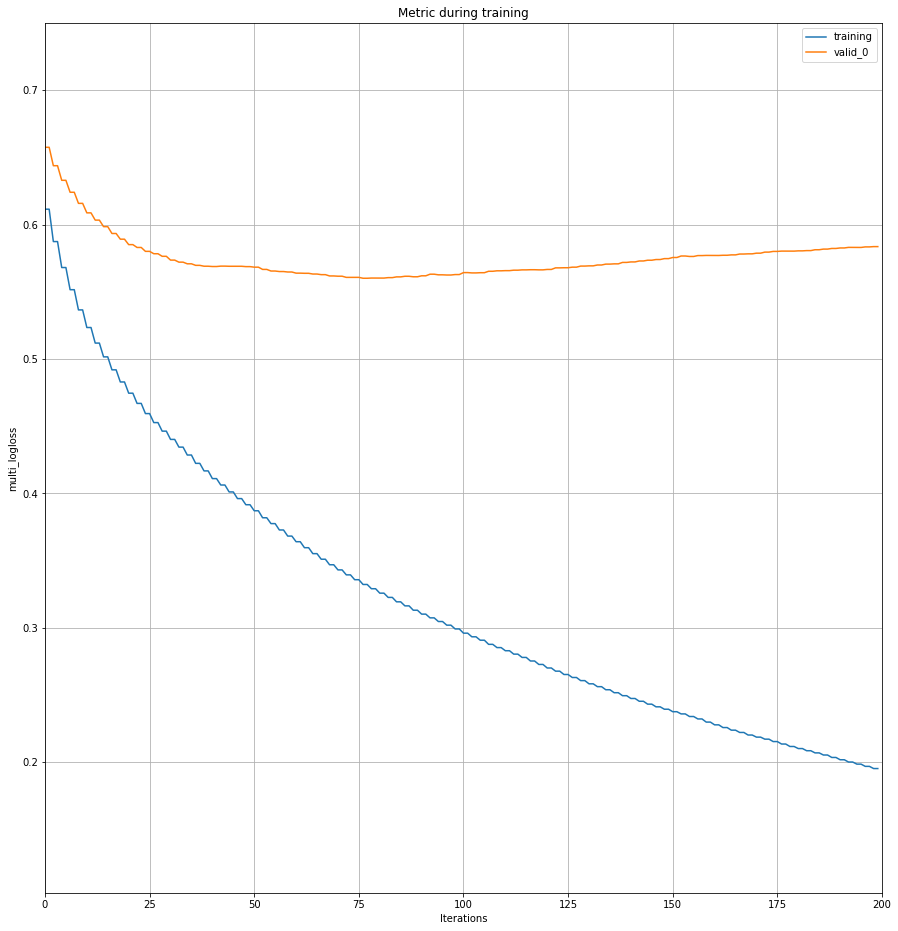

In [ ]:
lightgbm.plot_metric(model).figure.set_size_inches(15, 16)

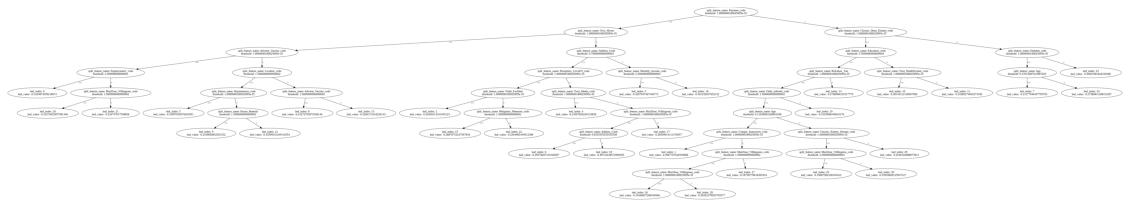

In [ ]:
lightgbm.plot_tree(model,figsize=(20,20))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


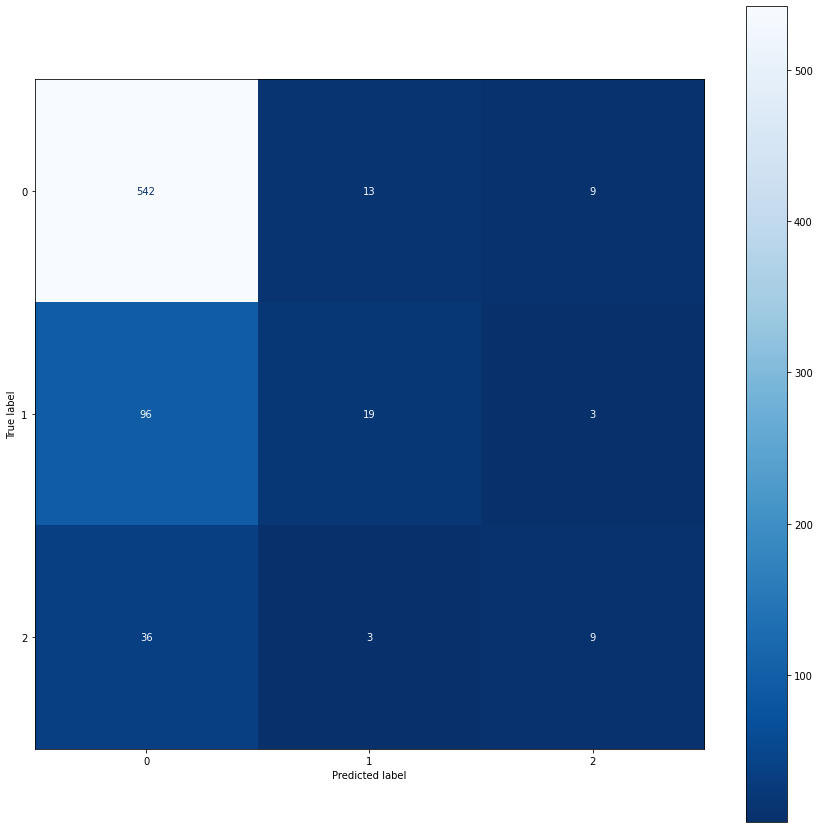

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
metrics.plot_confusion_matrix(model,X_test,y_test,cmap='Blues_r', ax=ax)

In [ ]:
print(metrics.classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88       564
           1       0.54      0.16      0.25       118
           2       0.43      0.19      0.26        48

    accuracy                           0.78       730
   macro avg       0.59      0.44      0.46       730
weighted avg       0.74      0.78      0.73       730

